In [1]:
#BiocManager::install(c("mygene", "dataPreparation"))
# load libraries
library(mygene)
library(ggplot2)
library(splines)
library(dataPreparation)
library(biomaRt)
library(dplyr)
library(ggthemes)
library(scales)
library(ArchR)
library(dplyr)
library(Seurat)
library(ggplot2)

Loading required package: GenomicFeatures

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4




In [2]:
PATH_TO_DATA       <- "../data"
FILENAME_ARROWFILE <-  "../data/10k_sorted.arrow"
FILENAME_SEURAT    <- "../data/sorted_10k_seurat.rds"

setwd(PATH_TO_DATA)

In [19]:
# ++++++++++++++++++++++++++++++++++ 
# ++++++++++ Gene Scores +++++++++++
# ++++++++++++++++++++++++++++++++++
gsm_se   <- getMatrixFromArrow(FILENAME_ARROWFILE, 'GeneScoreMatrix')
gsm      <- assays(gsm_se)[['GeneScoreMatrix']]
row_data <- rowData(gsm_se)
genes    <- row_data["name"]
gsm_df   <- as.data.frame(as.matrix(gsm))
row.names(gsm_df) <- genes$name
colnames(gsm_df)  <- substring(colnames(gsm_df), 11, 30)

ArchR logging to : ArchRLogs/ArchR-getMatrixFromArrow-4a7c39ec5b-Date-2020-12-05_Time-22-44-33.log
If there is an issue, please report to github with logFile!

2020-12-05 22:44:34 : Getting GeneScoreMatrix from ArrowFile : 10k_sorted.arrow, 0.004 mins elapsed.

2020-12-05 22:45:09 : Organizing SE GeneScoreMatrix from ArrowFile : 10k_sorted.arrow, 0.598 mins elapsed.



In [20]:
# ++++++++++++++++++++++++++++++++++ 
# ++++++++ Gene Expression +++++++++
# ++++++++++++++++++++++++++++++++++ 

seurat_obj <- readRDS(file = FILENAME_SEURAT)
data_matrix = GetAssayData(object=seurat_obj, assay="RNA", slot="data")
gex_df = as.data.frame(data_matrix)

In [21]:
# ++++++++++++++++++++++++++++++++++
# +++++ Ordering and Filtering +++++
# ++++++++++++++++++++++++++++++++++
# check which genes are in both datasets
gsm_df_rn <- rownames(gsm_df)
gex_df_rn <- rownames(gex_df)

message("genes * samples: gsm")
dim(gsm_df)
message("genes * samples: gex")
dim(gex_df)
message("gene intersect")
intersect(gex_df_rn, gsm_df_rn) %>% length # number of genes that are in both datasets
message("gsm genes to be dropped")
length(setdiff(gsm_df_rn, intersect(gex_df_rn, gsm_df_rn)))
message("gex gsm genes to be dropped")
length(setdiff(gex_df_rn, intersect(gex_df_rn, gsm_df_rn)))

genes * samples: gsm



[1] 24919 11584

genes * samples: gex



[1] 29732 11909

gene intersect



[1] 19241

gsm genes to be dropped



[1] 5678

gex gsm genes to be dropped



[1] 10491

In [22]:
which(rownames(gex_df) %in% intersect(gex_df_rn, gsm_df_rn))

[1]     8     9    10    11    14    15    16    17    18    19    21    22
   [13]    24    25    27    30    31    32    33    34    35    37    39    40
   [25]    41    42    44    45    46    47    48    49    50    51    53    54
   [37]    55    56    57    58    59    60    62    65    66    67    69    70
   [49]    71    72    73    75    76    77    78    79    82    84    86    88
   [61]    89    90    92    93    95    96    98    99   100   102   104   105
   [73]   107   108   109   111   112   113   115   116   117   118   119   122
   [85]   127   128   129   130   131   132   133   134   135   137   138   139
   [97]   140   141   142   143   144   145   146   147   148   151   155   157
  [109]   159   160   161   164   166   167   168   169   171   172   173   174
  [121]   175   176   177   178   179   180   182   183   184   185   186   187
  [133]   188   191   193   194   195   196   199   201   202   203   205   207
  [145]   209   210   211   213   214   216   217   218   219   220   222   225
  [157]   226   227   228   229   230   231   232   233   234   236   237   239
  [169]   240   241   242   243   245   247   248   249   250   251   252   253
  [181]   254   258   259   260   261   264   265   266   267   268   269   271
  [193]   273   275   277   279   280   281   283   284   285   286   287   288
  [205]   289   292   294   295   296   297   298   302   304   308   310   311
  [217]   312   314   315   316   317   318   319   321   322   323   325   326
  [229]   327   328   330   331   332   333   334   335   337   340   341   342
  [241]   343   344   345   346   348   349   350   351   353   355   356   357
  [253]   358   359   360   361   362   364   365   367   370   371   373   374
  [265]   375   376   377   378   379   380   381   384   386   388   389   390
  [277]   391   392   394   395   397   398   400   401   402   404   405   406
  [289]   408   410   411   412   413   414   415   416   417   418   419   421
  [301]   422   424   425   426   429   430   431   433   435   436   438   439
  [313]   444   447   449   450   451   452   453   455   457   459   460   462
  [325]   463   464   465   466   468   469   470   473   474   475   476   477
  [337]   478   479   480   481   482   484   485   487   488   489   490   491
  [349]   492   493   494   495   496   497   499   500   501   502   503   504
  [361]   505   508   509   511   514   515   519   520   521   522   524   525
  [373]   526   527   528   531   532   533   534   535   536   537   538   539
  [385]   542   543   544   546   547   549   550   551   552   554   555   556
  [397]   558   561   562   563   564   565   567   568   569   570   571   572
  [409]   575   576   578   581   584   586   587   589   590   592   593   594
  [421]   595   596   597   598   599   601   602   603   604   605   606   607
  [433]   608   610   611   612   613   614   615   617   619   620   621   623
  [445]   625   627   629   630   631   632   633   634   636   637   638   639
  [457]   641   642   644   645   647   648   649   650   652   653   656   658
  [469]   659   660   661   662   663   664   665   667   668   669   670   671
  [481]   673   675   676   677   678   679   680   682   683   684   685   686
  [493]   687   688   689   691   692   693   694   695   700   702   703   704
  [505]   705   706   707   711   712   713   714   715   716   717   718   719
  [517]   724   725   726   727   728   729   730   732   733   734   736   738
  [529]   740   743   745   748   749   750   751   754   755   756   757   759
  [541]   761   763   764   766   767   768   769   770   773   774   775   776
  [553]   778   779   780   782   783   784   786   787   788   789   790   791
  [565]   794   795   796   798   800   802   803   804   805   807   809   811
  [577]   812   813   814   815   817   818   819   820   821   822   823   825
  [589]   826   827   829   830   831   832   833   834   835   836   837   838
  [6

In [23]:
rows.to.keep_gex<-which(rownames(gex_df) %in% intersect(gex_df_rn, gsm_df_rn))
rows.to.keep_gsm<-which(rownames(gsm_df) %in% intersect(gex_df_rn, gsm_df_rn))

In [35]:
head(gex_df[rows.to.keep_gex,])
head(gsm_df[rows.to.keep_gsm,]  %>% rename_with( ~ gsub("#", "", .)))

AAACAGCCAAGGAATC-1 AAACAGCCAATCCCTT-1 AAACAGCCAATGCGCT-1
FAM87B    0.0000000          0                  0                 
LINC01128 0.0000000          0                  0                 
LINC00115 0.7854152          0                  0                 
FAM41C    0.0000000          0                  0                 
LINC02593 0.0000000          0                  0                 
SAMD11    0.0000000          0                  0                 
          AAACAGCCACACTAAT-1 AAACAGCCACCAACCG-1 AAACAGCCAGGATAAC-1
FAM87B    0                  0                  0                 
LINC01128 0                  0                  0                 
LINC00115 0                  0                  0                 
FAM41C    0                  0                  0                 
LINC02593 0                  0                  0                 
SAMD11    0                  0                  0                 
          AAACAGCCAGTAGGTG-1 AAACAGCCAGTTTACG-1 AAACAGCCATCCAGGT-1
FAM87B    0                  0                  0.0000000         
LINC01128 0                  0                  0.0000000         
LINC00115 0                  0                  0.8263733         
FAM41C    0                  0                  0.0000000         
LINC02593 0                  0                  0.0000000         
SAMD11    0                  0                  0.0000000         
          AAACATGCAAGGTCCT-1 ⋯ TTTGTGTTCTCCATAT-1 TTTGTTGGTCAGGAAG-1
FAM87B    0                  ⋯ 0                  0                 
LINC01128 0                  ⋯ 0                  0                 
LINC00115 0                  ⋯ 0                  0                 
FAM41C    0                  ⋯ 0                  0                 
LINC02593 0                  ⋯ 0                  0                 
SAMD11    0                  ⋯ 0                  0                 
          TTTGTTGGTCCACAAA-1 TTTGTTGGTCTTTATG-1 TTTGTTGGTGACATGC-1
FAM87B    0                  0                  0                 
LINC01128 0                  0                  0                 
LINC00115 0                  0                  0                 
FAM41C    0                  0                  0                 
LINC02593 0                  0                  0                 
SAMD11    0                  0                  0                 
          TTTGTTGGTGTTAAAC-1 TTTGTTGGTTAGGATT-1 TTTGTTGGTTGCAGTA-1
FAM87B    0                  0                  0                 
LINC01128 0                  0                  0                 
LINC00115 0                  0                  0                 
FAM41C    0                  0                  0                 
LINC02593 0                  0                  0                 
SAMD11    0                  0                  0                 
          TTTGTTGGTTGGTTAG-1 TTTGTTGGTTTGCAGA-1
FAM87B    0                  0                 
LINC01128 0                  0                 
LINC00115 0                  0                 
FAM41C    0                  0                 
LINC02593 0                  0                 
SAMD11    0                  0

TGAGCAAAGGCCTGGT-1 AACCGCTCATATAACC-1 GGAGTCTGTGAGCAAG-1
FAM87B    0                  0.000              0.000             
LINC01128 0                  0.277              0.190             
LINC00115 0                  0.614              0.351             
FAM41C    0                  0.191              0.346             
LINC02593 0                  0.436              1.165             
SAMD11    0                  0.212              1.253             
          TAGCTAGGTTTGGGTA-1 TTGGAGGCAGGCTTCG-1 GTTAAGTGTCACTCGC-1
FAM87B    0.000              0.000              0.000             
LINC01128 0.000              0.170              0.115             
LINC00115 0.000              0.318              0.259             
FAM41C    0.000              0.391              0.050             
LINC02593 0.000              0.546              1.087             
SAMD11    0.161              0.199              0.690             
          AATCGCCCAACCCTCC-1 GGTTGCATCCTGGCTT-1 CATAGACTCCCTGGAA-1
FAM87B    0                  0                  0.000             
LINC01128 0                  0                  0.122             
LINC00115 0                  0                  0.128             
FAM41C    0                  0                  0.054             
LINC02593 0                  0                  0.289             
SAMD11    0                  0                  0.147             
          GGTTGCGGTAAACAAG-1 ⋯ TTAACTGAGCGTGCAC-1 AAGACATAGAACCTGT-1
FAM87B    0                  ⋯  0.000             0                 
LINC01128 0                  ⋯  5.790             0                 
LINC00115 0                  ⋯  5.383             0                 
FAM41C    0                  ⋯  2.598             0                 
LINC02593 0                  ⋯ 13.691             0                 
SAMD11    0                  ⋯  6.950             0                 
          GGTTTGTAGCTCATAA-1 AGAGGATGTAACGTGC-1 CCGTTGCGTACGATTG-1
FAM87B    0                  0                  0                 
LINC01128 0                  0                  0                 
LINC00115 0                  0                  0                 
FAM41C    0                  0                  0                 
LINC02593 0                  0                  0                 
SAMD11    0                  0                  0                 
          TTACCGTGTTCAAGCA-1 ATTACGTCATTATGAC-1 CTTGAACAGCGGGCAA-1
FAM87B    0                  0                  0                 
LINC01128 0                  0                  0                 
LINC00115 0                  0                  0                 
FAM41C    0                  0                  0                 
LINC02593 0                  0                  0                 
SAMD11    0                  0                  0                 
          TAACCTAAGTAAAGGT-1 CAAGTATGTCTTTATG-1
FAM87B    0                  0                 
LINC01128 0                  0                 
LINC00115 0                  0                 
FAM41C    0                  0                 
LINC02593 0                  0                 
SAMD11    0                  0

In [37]:
# keep only rows and cells that are in the intersect
rows.to.keep_gex<-which(rownames(gex_df) %in% intersect(gex_df_rn, gsm_df_rn))
rows.to.keep_gsm<-which(rownames(gsm_df) %in% intersect(gex_df_rn, gsm_df_rn))
gsm_df <- gsm_df %>% rename_with( ~ gsub("#", "", .)) # renaming problem
gex_df <- gex_df[rows.to.keep_gex, intersect(colnames(gex_df), colnames(gsm_df))]
gsm_df <- gsm_df[rows.to.keep_gsm, intersect(colnames(gex_df), colnames(gsm_df))] 

In [38]:
message("genes * samples: gsm")
dim(gsm_df)
message("genes * samples: gex")
dim(gex_df)

genes * samples: gsm



[1] 19241 11361

genes * samples: gex



[1] 19241 11361

In [39]:
# order rows and columns in increasing order
gex_df <-  gex_df[, order(names(gex_df))]
gex_df <-  gex_df[order(row.names(gex_df)), ]
gsm_df <-  gsm_df[, order(names(gsm_df))]
gsm_df <-  gsm_df[order(row.names(gsm_df)), ]

In [40]:
message("genes * samples: gsm")
dim(gsm_df)
message("genes * samples: gex")
dim(gex_df)

genes * samples: gsm



[1] 19241 11361

genes * samples: gex



[1] 19241 11361

[1] 4.660719

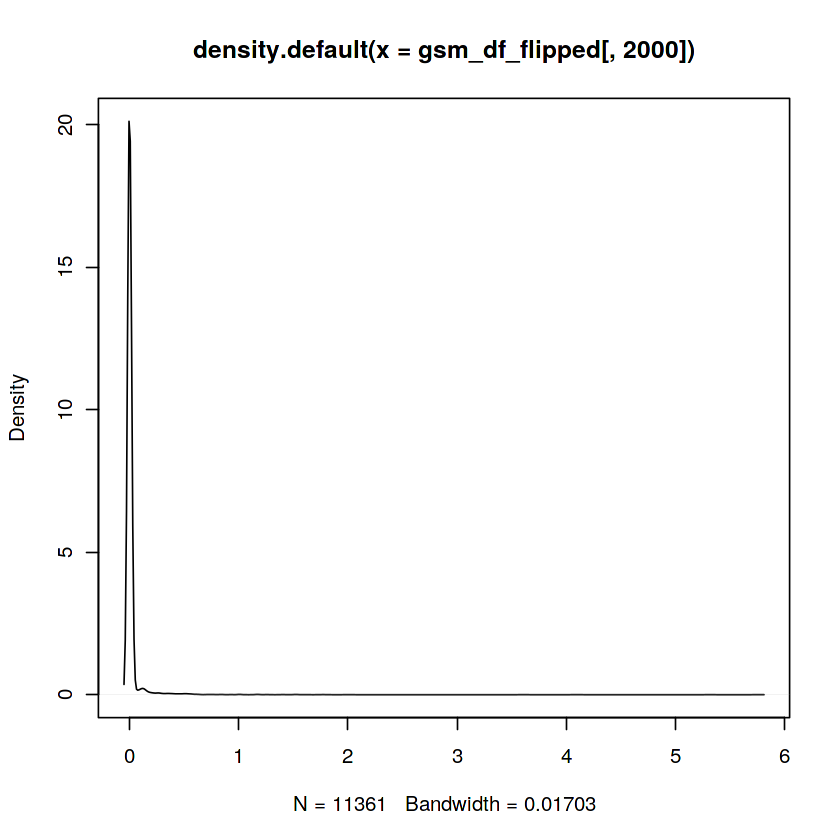

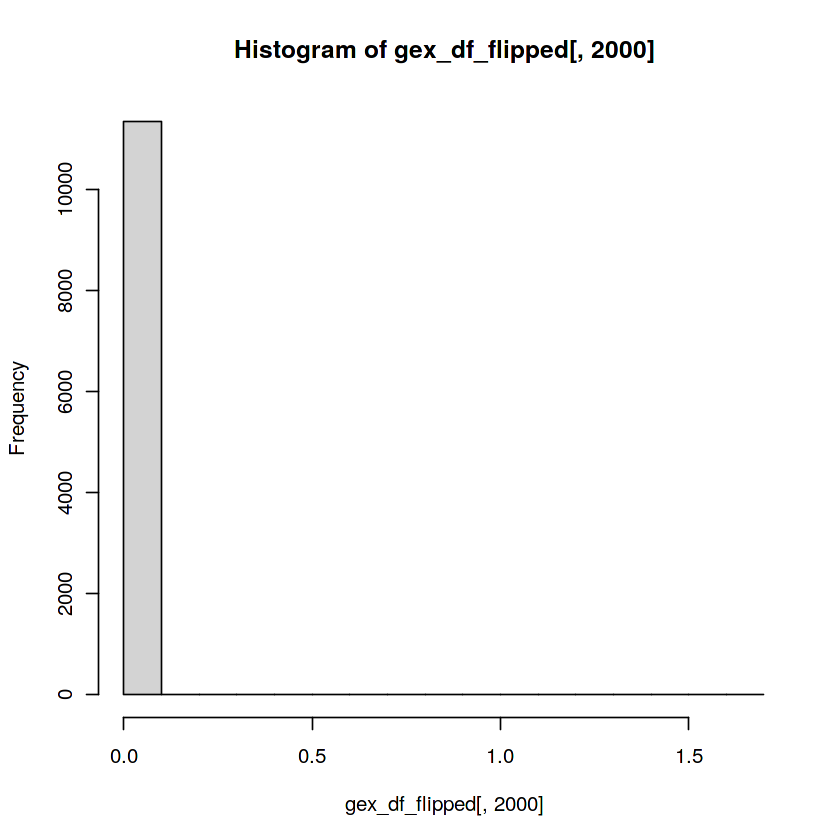

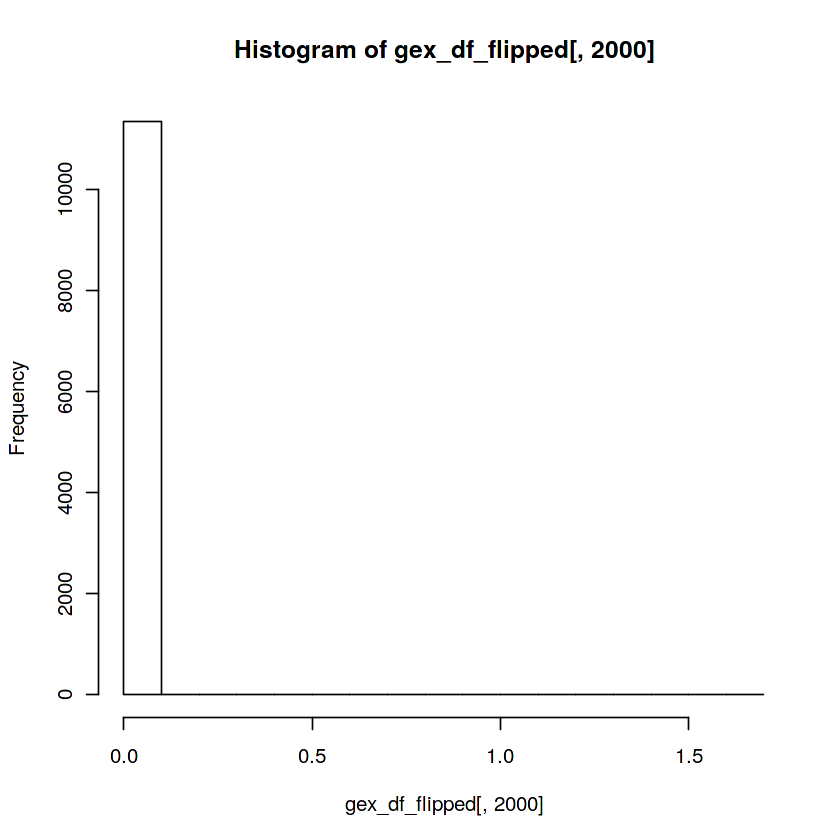

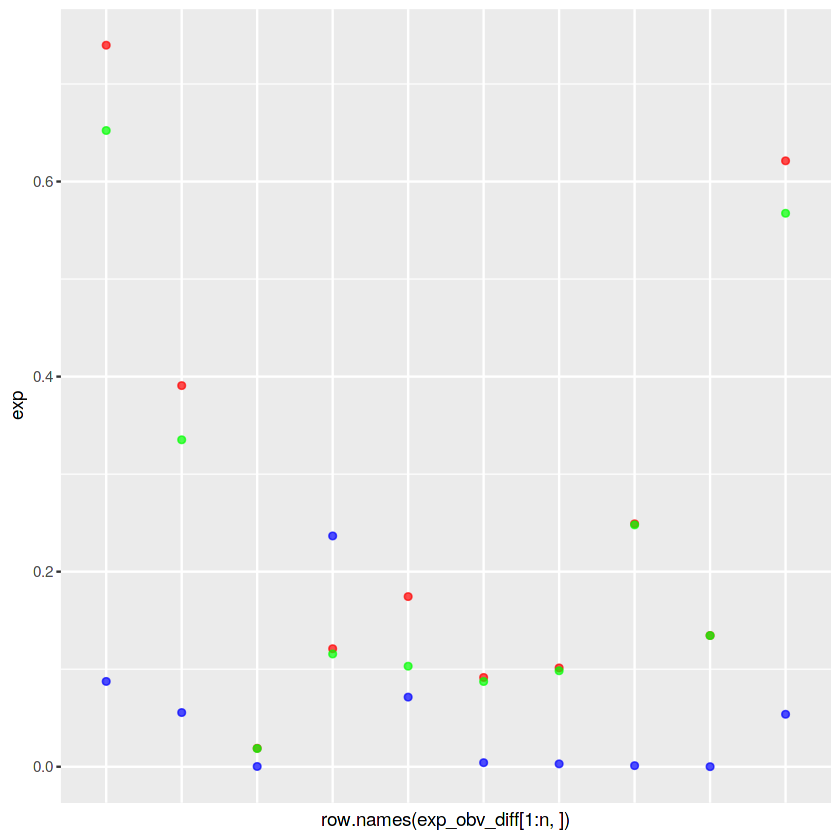

In [41]:
# write.table(gsm_df, "10k_sorted_gsm_df.txt")
# write.table(gex_df, "10k_sorted_gex_df.txt")

# some basic exploratory plots
gsm_df_flipped = t(gsm_df)
gex_df_flipped = t(gex_df)
d1 = density(gsm_df_flipped[ ,2000])
plot(d1)
max(gex_df_flipped[,210])
d2 = hist(gex_df_flipped[ ,2000])
plot(d2)

# dataframe with the average expected, observed, and difference for each gene
exp_obv_diff = data.frame(exp=double(), obv=double(), abs_diff=double(), rel_diff=double())

for(i in 1:ncol(gsm_df_flipped)) {
  exp_i = sum(gsm_df_flipped[,i])/nrow(gsm_df_flipped)
  obv_i = sum(gex_df_flipped[,i])/nrow(gex_df_flipped)
  abs_diff_i = sum(c(abs(exp_i - obv_i)))
  rel_diff_i = abs_diff_i/obv_i
  
  exp_obv_diff[i, 1] = exp_i
  exp_obv_diff[i, 2] = obv_i
  exp_obv_diff[i, 3] = abs_diff_i
  exp_obv_diff[i, 4] = rel_diff_i
}

row.names(exp_obv_diff) <- colnames(gsm_df_flipped)

# function to plot expected and observed and relative difference for any number of genes
plot_diffs <- function(dataframe = exp_obv_diff, n = 20) {
  ggplot(exp_obv_diff[1:n,]) +
    geom_point(aes(x=row.names(exp_obv_diff[1:n,]), y = exp), colour='red', alpha=0.7) +
    geom_point(aes(x=row.names(exp_obv_diff[1:n,]), y = obv), colour='blue', alpha=0.7) +
    geom_point(aes(x=row.names(exp_obv_diff[1:n,]), y = abs_diff), colour='green', alpha=0.7) +
    theme(axis.text.x=element_blank(),
          axis.ticks.x=element_blank())
}

plot_diffs(n=10)

In [20]:
# loading in the data
# GSM_FILE <- "10k_sorted_gsm_df.txt"
# GEX_FILE <- "10k_sorted_gex_df.txt"


# setwd(PATH_TO_DATA)
# gsm_df = read.table(GSM_FILE,sep=" ")
# gex_df = read.table(GEX_FILE,sep=" ")

In [42]:
dim(gsm_df)
dim(gex_df)
head(gsm_df)

[1] 19241 11361

[1] 19241 11361

AAACAGCCAAGGAATC-1 AAACAGCCAATCCCTT-1 AAACAGCCAATGCGCT-1
A1BG     1.297              0.583              0                 
A1BG-AS1 0.653              0.718              0                 
A1CF     0.000              0.376              0                 
A2M      0.000              0.000              0                 
A2M-AS1  0.000              0.000              0                 
A2ML1    0.000              0.251              0                 
         AAACAGCCACACTAAT-1 AAACAGCCACCAACCG-1 AAACAGCCAGGATAAC-1
A1BG     0                  3.114              0.000             
A1BG-AS1 0                  2.156              0.000             
A1CF     0                  0.000              0.000             
A2M      0                  0.000              0.000             
A2M-AS1  0                  0.000              4.537             
A2ML1    0                  0.000              0.000             
         AAACAGCCAGTAGGTG-1 AAACAGCCAGTTTACG-1 AAACAGCCATCCAGGT-1
A1BG     1.580              0.000              0.000             
A1BG-AS1 1.313              0.000              0.000             
A1CF     0.000              0.000              0.000             
A2M      0.000              0.000              0.000             
A2M-AS1  0.000              0.000              0.000             
A2ML1    0.000              0.271              0.277             
         AAACATGCAAGGTCCT-1 ⋯ TTTGTGTTCGGTCAAT-1 TTTGTGTTCGTCAAGT-1
A1BG     0.516              ⋯ 0.857              0.000             
A1BG-AS1 0.714              ⋯ 0.396              0.000             
A1CF     0.000              ⋯ 0.000              0.000             
A2M      0.000              ⋯ 0.075              0.416             
A2M-AS1  0.000              ⋯ 0.000              0.000             
A2ML1    0.000              ⋯ 0.000              0.000             
         TTTGTGTTCTCCATAT-1 TTTGTTGGTCAGGAAG-1 TTTGTTGGTCCACAAA-1
A1BG     0.000              1.700              1.695             
A1BG-AS1 0.000              0.000              2.348             
A1CF     0.000              0.000              0.000             
A2M      0.285              0.000              0.000             
A2M-AS1  0.000              0.000              0.000             
A2ML1    0.000              0.712              0.000             
         TTTGTTGGTGACATGC-1 TTTGTTGGTGTTAAAC-1 TTTGTTGGTTAGGATT-1
A1BG     2.315              0                  0                 
A1BG-AS1 0.000              0                  0                 
A1CF     0.000              0                  0                 
A2M      0.000              0                  0                 
A2M-AS1  0.000              0                  0                 
A2ML1    0.000              0                  0                 
         TTTGTTGGTTGGTTAG-1 TTTGTTGGTTTGCAGA-1
A1BG     0                  0.583             
A1BG-AS1 0                  0.360             
A1CF     0                  0.000             
A2M      0                  0.000             
A2M-AS1  0                  0.000             
A2ML1    0                  0.251

In [43]:
#++++++++++++++++++++++++++++++++++++++++++
#++++++++++++ UTILITY FUNCTIONS +++++++++++
#++++++++++++++++++++++++++++++++++++++++++

# generate a data frame with gene score and expression data for a given gene
getGeneData <- function(geneName) {
  geneDF <- data.frame(matrix(nrow=ncol(gsm_df), ncol=2))
  colnames(geneDF) <- c("GSM", "GEX")
  geneDF$GSM <- t(gsm_df[geneName,])
  geneDF$GEX <- t(gex_df[geneName,])
  return(geneDF)
}

# split data into training and test sets
splitData <- function(data, prop=0.8) {
  train_index <- sample(1:nrow(data), prop * nrow(data))
  test_index <- setdiff(1:nrow(data), train_index)
  train <- data[train_index, ]
  test <- data[test_index, ]
  splitData = list(train, test)
}

# get gene length and add it to a matrix
getGeneLengths <- function(genelist) {
  ensembl_human <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")
  lengthData <- getBM(mart = ensembl_human,
                               attributes = c("external_gene_name","start_position","end_position"),
                               filters = "external_gene_name",
                               values = genelist)
  lengthData$length = lengthData$end_position - lengthData$start_position
  return(lengthData)
}

# plot a scatter plot for gene score vs expression for a given gene and fit a local regression on the data
plotSingleGene <- function(geneName) {
  geneDF = getGeneData(geneName)
  gg <- ggplot(geneDF, aes(x=GSM, y=GEX)) + 
    geom_point() + 
    geom_smooth(method="loess", se=T) + 
    labs(subtitle="GSM vs GEX", 
         y="GEX", 
         x="GSM", 
         title=geneName) 
  plot(gg)
}

# Get gene ontology terms for all genes
getOntologies <- function(go_data, numGO){
  ontologies <- data.frame(matrix(nrow=length(go_data$go.BP), ncol=numGO+1))
  colnames(ontologies) <- c("Gene", paste("GO", c(1:numGO), sep=""))
  ontologies[is.na(ontologies)] <- 0
  
  for (i in 1:length(go_data$go.BP)) {
    ontologies$Gene[i] <- go_data$query[i]
    if (is.null(go_data$go.BP[[i]]$term)==FALSE){
      for (j in 1:numGO){
        if (is.null(go_data$go.BP[[i]]$term[j]) == FALSE) {
          ontologies[i,j+1] <- go_data$go.BP[[i]]$term[j]
        }
        else{
          ontologies[i,j+1]=0
        }
      }
    }
    ontologies[is.na(ontologies)] <- 0
  }
  return(ontologies)
}

getGenesWithGO <- function(geneOntology, ontologies) {
  genes = ontologies[apply(ontologies, 1, function(x) any(grepl(geneOntology, x))), ][1]
  filtered_gsm = data.frame(GSM = c(t(gsm_df[genes$Gene,])), stringsAsFactors=FALSE)
  filtered_gex = data.frame(GEX = c(t(gex_df[genes$Gene,])), stringsAsFactors=FALSE)
  ontologyData = as.data.frame(cbind(filtered_gsm, filtered_gex))
  return(ontologyData)
}

# get gene data for a given ontology
getOntologyData <- function(geneOntology, numGOs) {
  genelist <- row.names(gsm_df)
  go_data <- queryMany(genelist, scopes='symbol', fields=c('go'), species='human')
  ontologies <- getOntologies(go_data, numGOs)
  results <-getGenesWithGO(geneOntology, ontologies)
  return(results)
}

# plot a scatter plot for gene score vs expression for a given gene ontology and fit a local regression on the data
plotGeneOntology <- function(geneOntology, results, numcells=5000) {
  gene_GO_DF = getGenesFromGO(geneOntology, results)
  gg <- ggplot(gene_GO_DF[1:numcells,], aes(x=GSM, y=GEX)) + 
    geom_point() + 
    geom_smooth(method="loess", se=T) + 
    labs(subtitle="GSM vs GEX", 
         y="GEX", 
         x="GSM", 
         title=geneOntology) 
  plot(gg)
}

In [47]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++ Single Gene Models +++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# fit a linear regression to data from a single gene
singleGeneRegression <- function(geneName) {
  data = getGeneData(geneName)
  split_data = splitData(data, prop=0.8)
  train = split_data[[1]]
  test = split_data[[2]]
  
  model <- lm(GEX~GSM, data=train)
  preds <- predict(model, newdata=test)
  
  conf.int <-predict(model, interval="confidence")
  lmdata <- cbind(train, conf.int)
  
  p <- ggplot(lmdata, aes(GSM, GEX)) +
       ggtitle(paste(geneName, "Linear Regression")) +
       geom_point() +
       stat_smooth(method=lm) +
       geom_line(aes(y=lwr), color="red", linetype="dashed") +
       geom_line(aes(y=upr), color="red", linetype="dashed")
  print(p)
  
  eval_data = data.frame(expected=test$GEX, predicted=preds)
  correlation = cor(eval_data[,1], eval_data[,2])
  return(correlation)
}

# fit a smoothing spline to data from a single gene
singleGeneSpline <- function(geneName, cv=FALSE, df=5) {
  data = getGeneData(geneName)
  split_data = splitData(data, prop=0.8)
  train = split_data[[1]]
  test = split_data[[2]]
  
  plot(train$GSM, train$GEX, cex=.5, main=paste(geneName, " Smoothing Spline"))
  if (cv==TRUE) {
    fit = smooth.spline(train$GSM, train$GEX, cv=TRUE)
  }
  else {
    fit = smooth.spline(train$GSM, train$GEX, df=df)
  }
  lines(fit, col="red", lwd=2)
  pred = predict(fit, test$GSM, se=T)
  eval_data = data.frame(expected=test$GEX, predicted=pred[2])
  correlation = cor(eval_data[,1], eval_data[,2])
  return(correlation)
}

# fitting using local regression
singleGeneLoess <- function(geneName, span=0.5) {
  data = getGeneData(geneName)
  gsmlims = range(data$GSM)
  gsm.grid=seq(from=gsmlims[1], to=gsmlims[2])
  
  split_data = splitData(data, prop=0.8)
  train = split_data[[1]]
  test = split_data[[2]]
  
  plot(train$GSM, train$GEX, cex=.5, main=paste(geneName, " Local Regression"))
  fit = loess(train$GEX~train$GSM, span=span, data=data)
  lines(fit, col="red", lwd=2)
  
  preds = predict(fit, test$GSM, se=T)
  eval_data = data.frame(expected=test$GEX, predicted=pred[2])
  correlation = cor(eval_data[,1], eval_data[,2])
  plot(eval_data)
  return(correlation)
}

In [48]:
#+++++++++++++++++++++++++++++++++++
#++++++++ ONTOLOGY MODELS ++++++++++
#+++++++++++++++++++++++++++++++++++

# fit a linear regression to data from a single gene
ontologyRegression <- function(geneOntology, numGO=2) {
  data = getOntologyData(geneOntology, numGO)
  split_data = splitData(data, prop=0.8)
  train = split_data[[1]]
  test = split_data[[2]]
  
  model <- lm(GEX~GSM, data=train)
  preds <- predict(model, newdata=test)
  
  conf.int <-predict(model, interval="confidence")
  lmdata <- cbind(train, conf.int)
  
  p <- ggplot(lmdata, aes(GSM, GEX)) +
    ggtitle(paste(geneOntology, "Linear Regression")) +
    geom_point() +
    stat_smooth(method=lm) +
    geom_line(aes(y=lwr), color="red", linetype="dashed") +
    geom_line(aes(y=upr), color="red", linetype="dashed")
  print(p)
  
  eval_data = data.frame(expected=test$GEX, predicted=preds)
  correlation = cor(eval_data[,1], eval_data[,2])
  return(correlation)
}

ontologySpline <- function(geneOntology, cv=FALSE, df=5, plot=FALSE, numGO=2) {
  data = getOntologyData(geneOntology, numGO)
  split_data = splitData(data, prop=0.8)
  train = split_data[[1]]
  test = split_data[[2]]
  
  if (plot==TRUE) {
    plot(train$GSM, train$GEX, cex=.5, main=paste(geneOntology, " Smoothing Spline"))
  }
  if (cv==TRUE) {
    fit = smooth.spline(train$GSM, train$GEX, cv=TRUE)
  }
  else {
    fit = smooth.spline(train$GSM, train$GEX, df=df)
  }
  
  if (plot==TRUE) {
    lines(fit, col="red", lwd=2)
  }
  pred = predict(fit, test$GSM, se=T)
  eval_data = data.frame(predicted=pred[2], expected=test$GEX)
  correlation = cor(eval_data[,1], eval_data[,2])
  plot(eval_data)
  return(correlation)
}

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



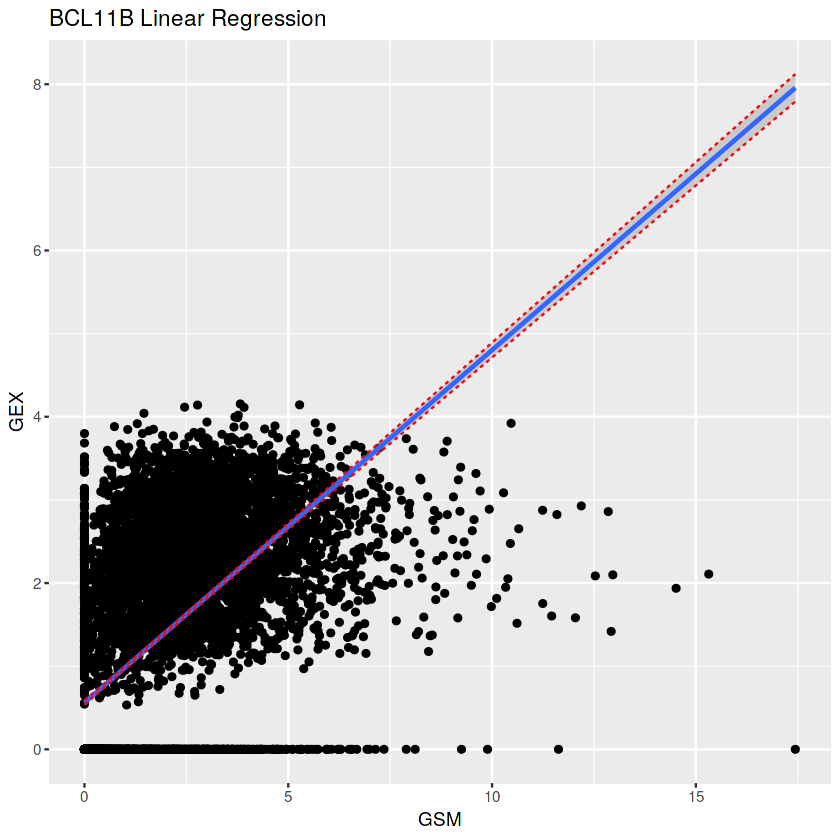

`geom_smooth()` using formula 'y ~ x'



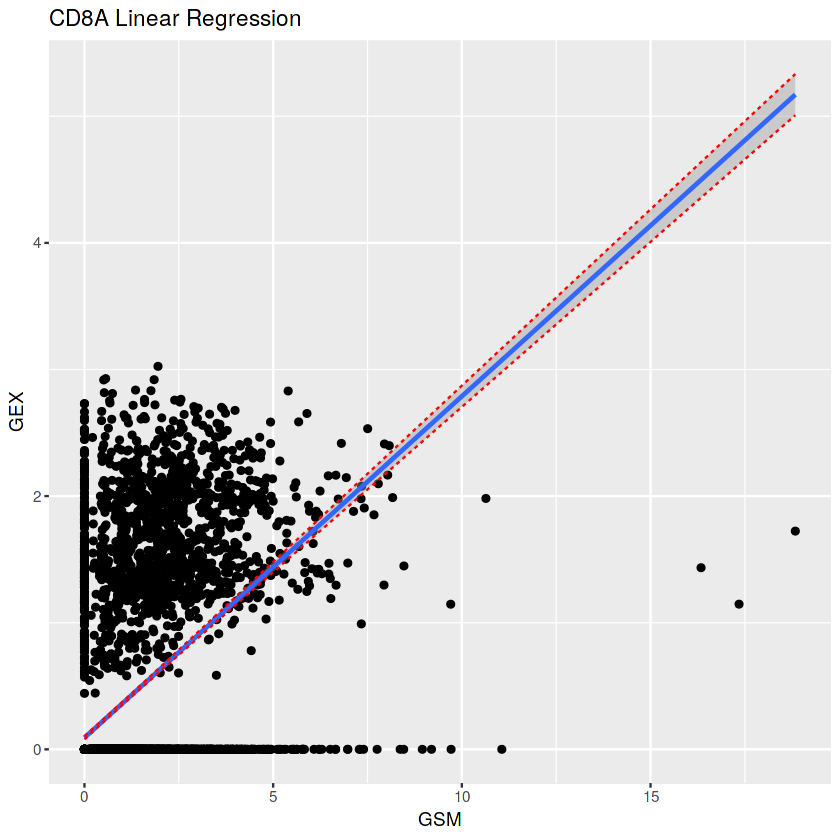

`geom_smooth()` using formula 'y ~ x'



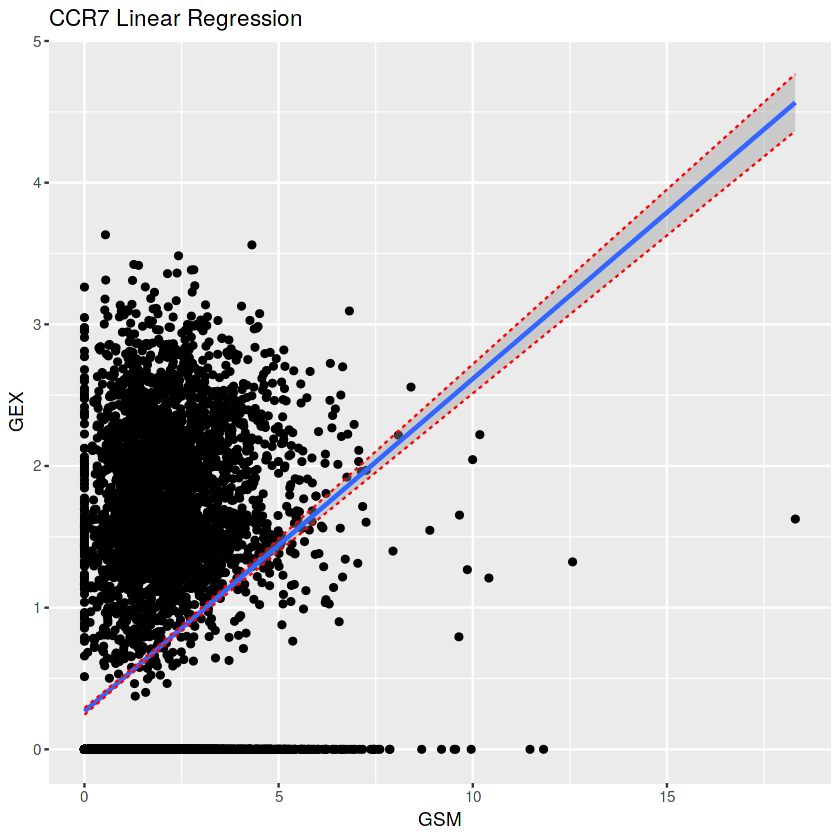

`geom_smooth()` using formula 'y ~ x'



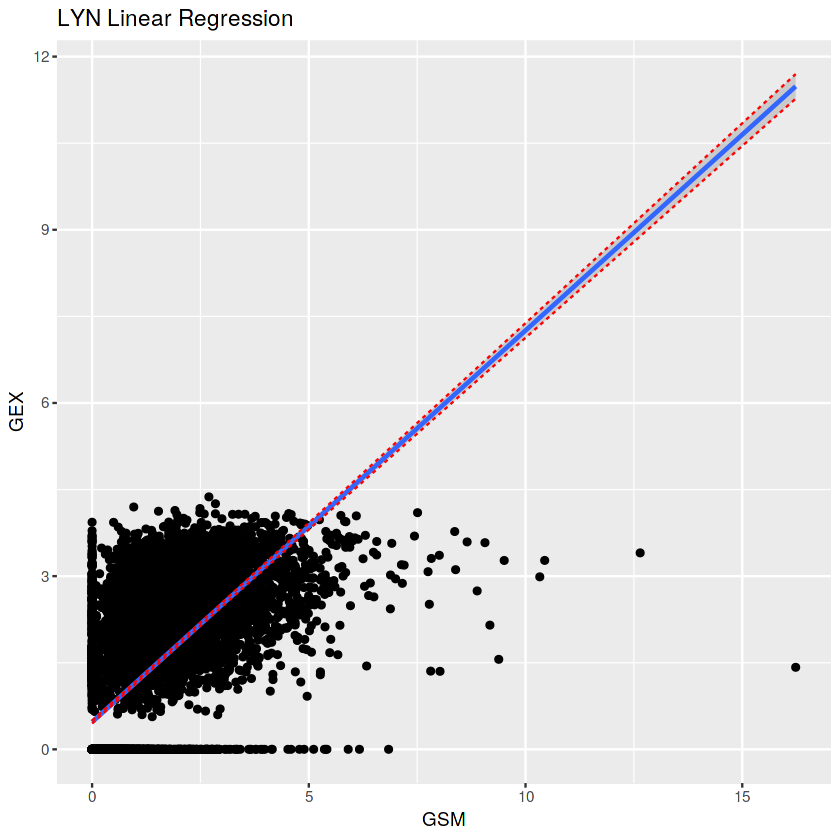

`geom_smooth()` using formula 'y ~ x'



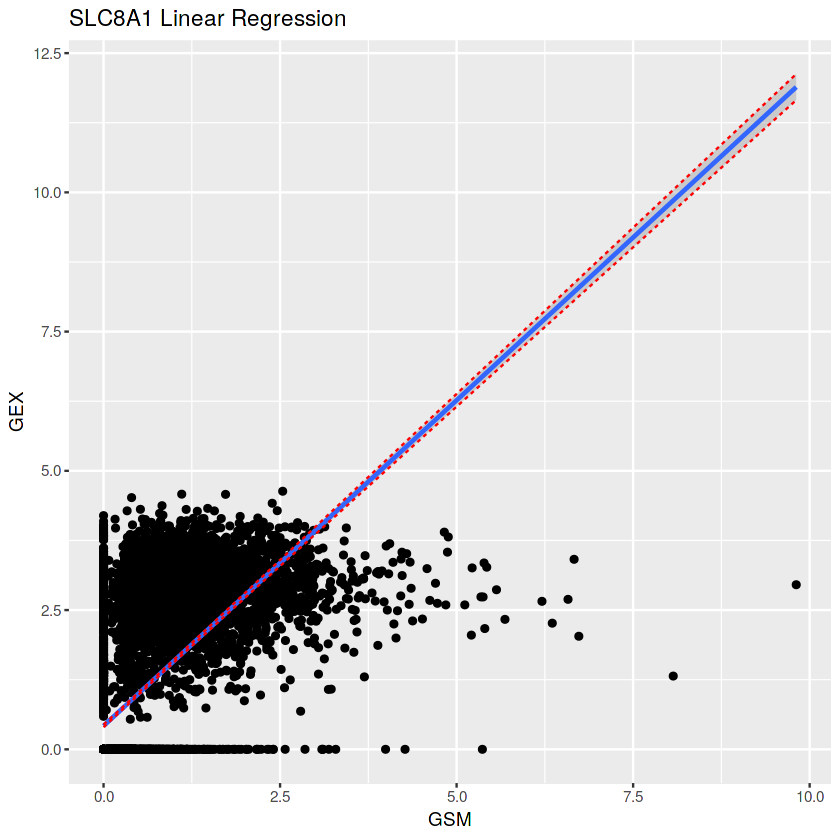

`geom_smooth()` using formula 'y ~ x'



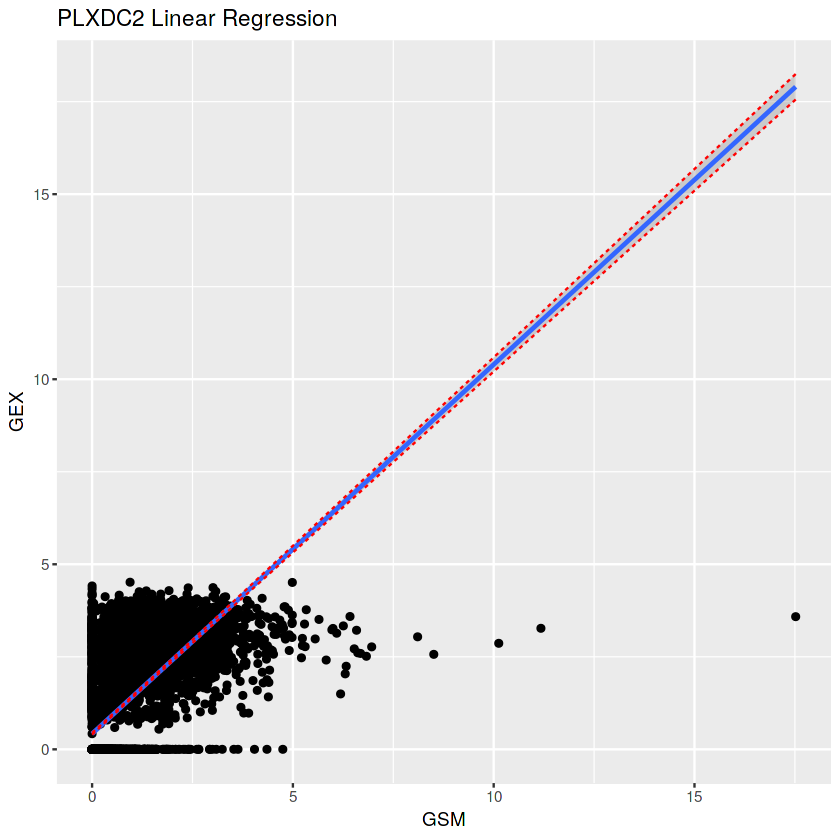

`geom_smooth()` using formula 'y ~ x'



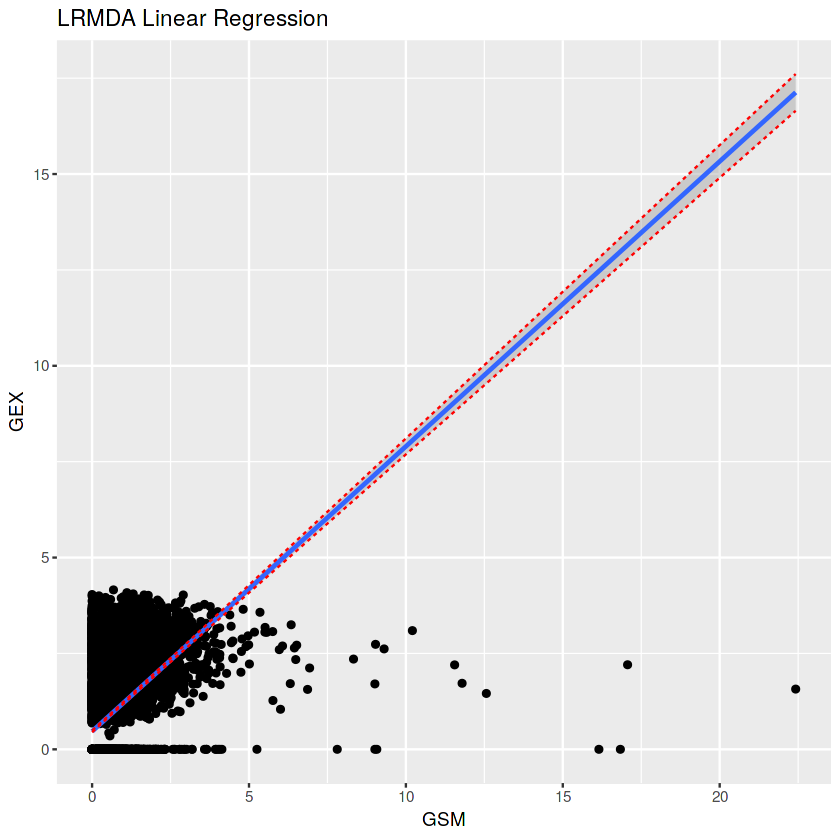

`geom_smooth()` using formula 'y ~ x'



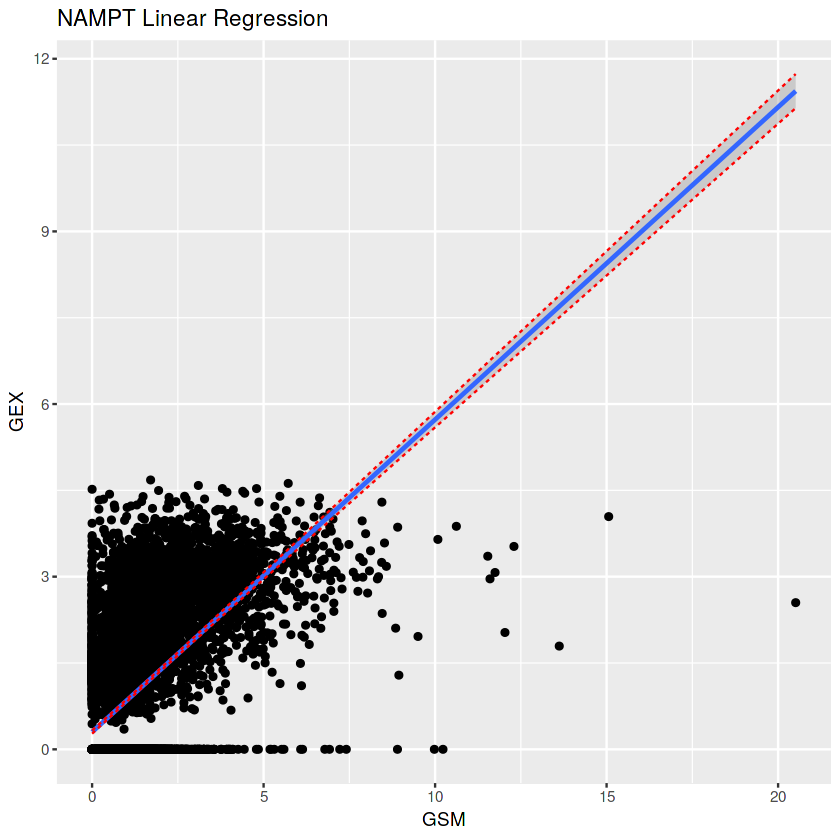

`geom_smooth()` using formula 'y ~ x'



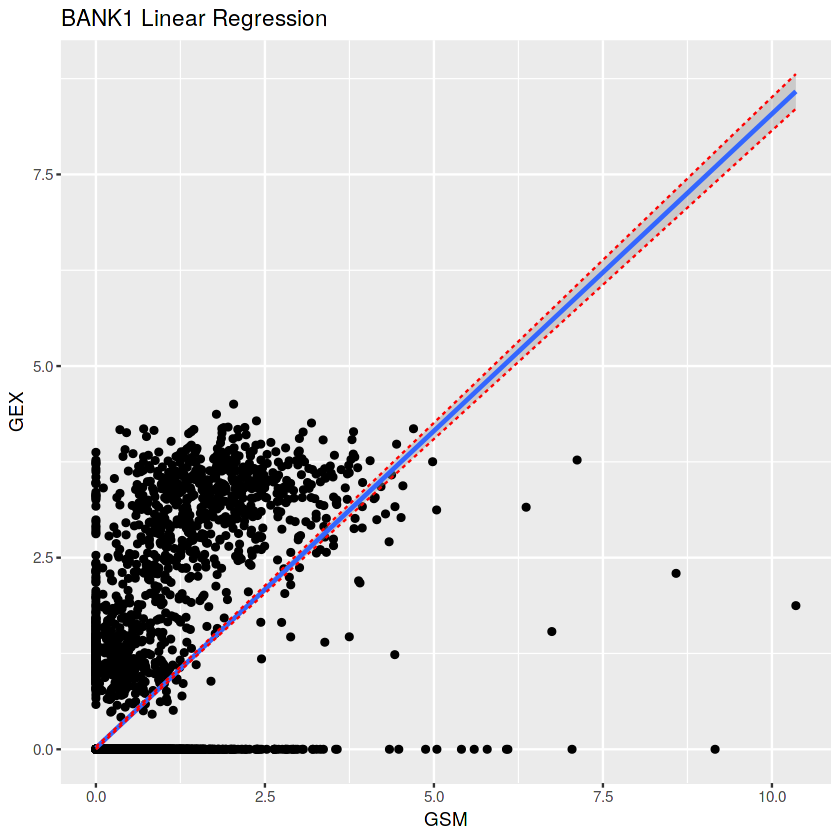

`geom_smooth()` using formula 'y ~ x'



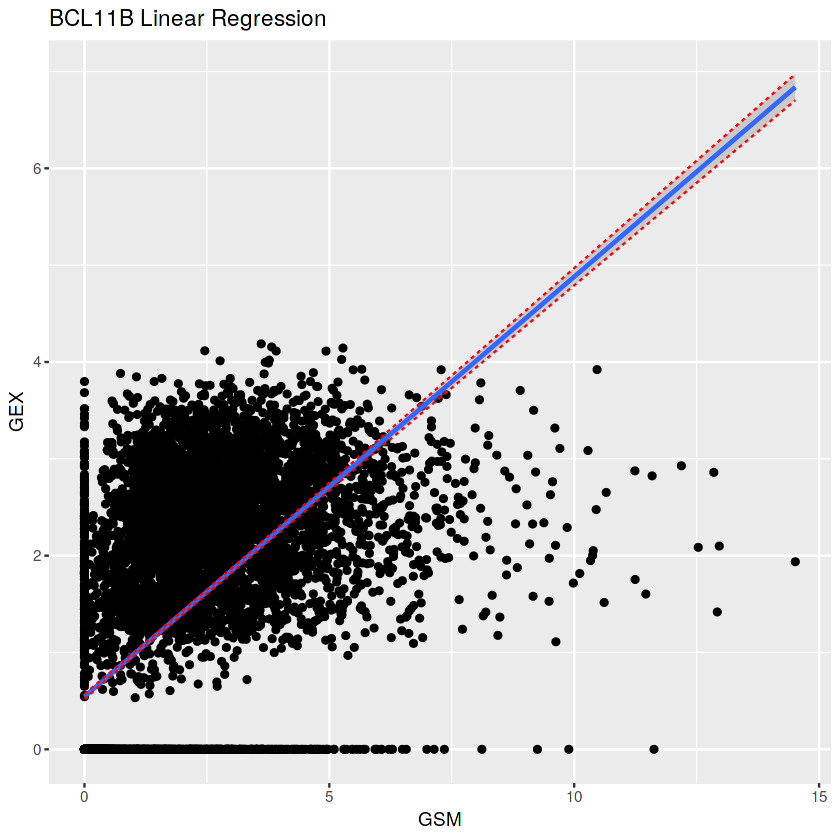

`geom_smooth()` using formula 'y ~ x'



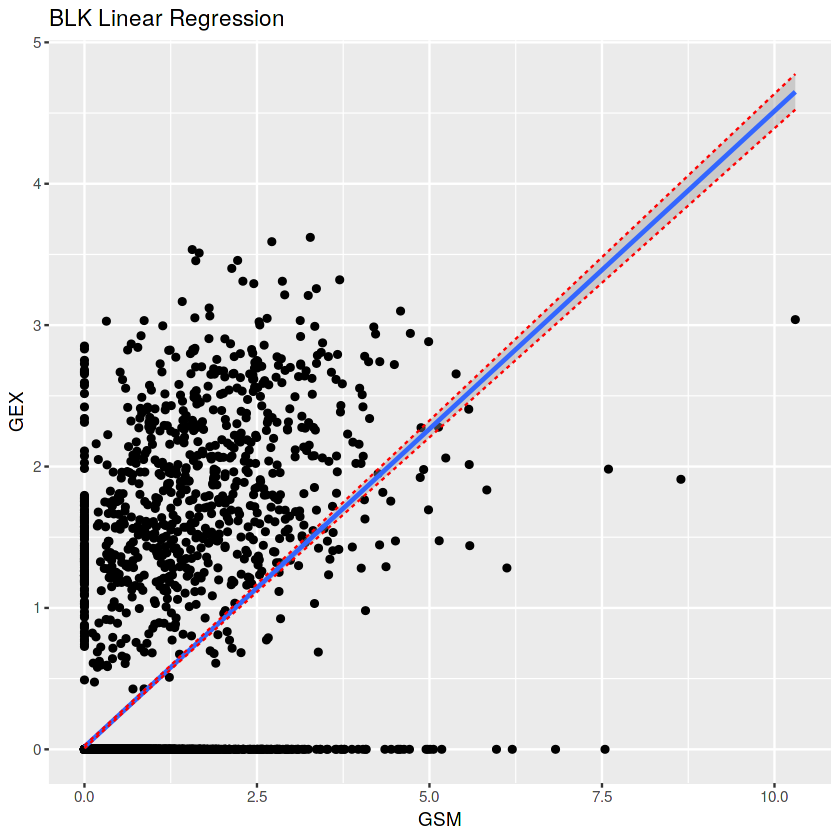

`geom_smooth()` using formula 'y ~ x'



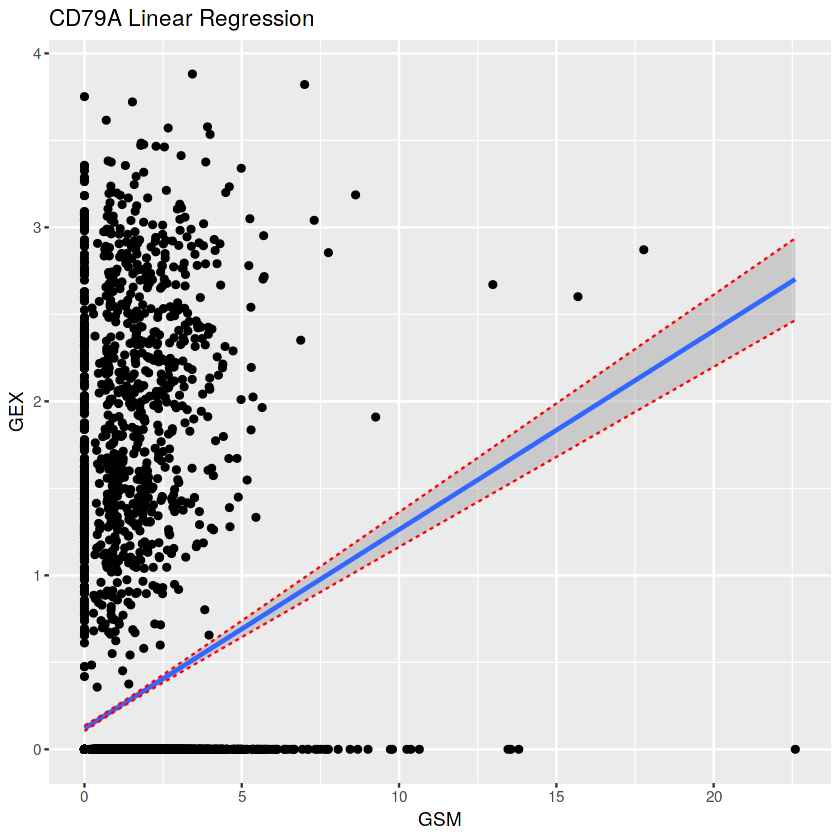

`geom_smooth()` using formula 'y ~ x'



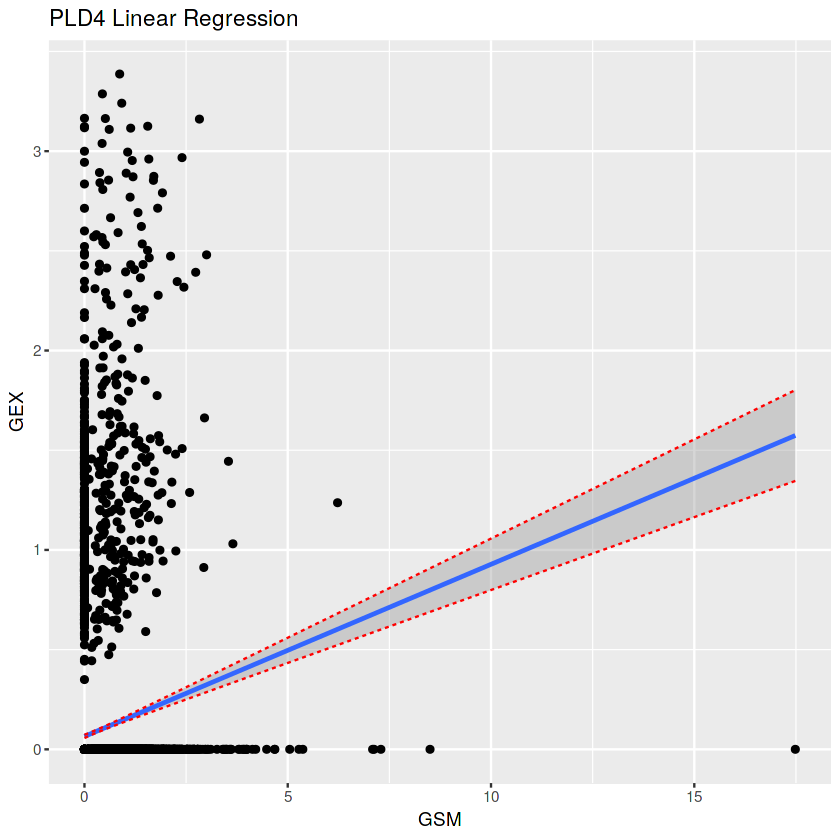

`geom_smooth()` using formula 'y ~ x'



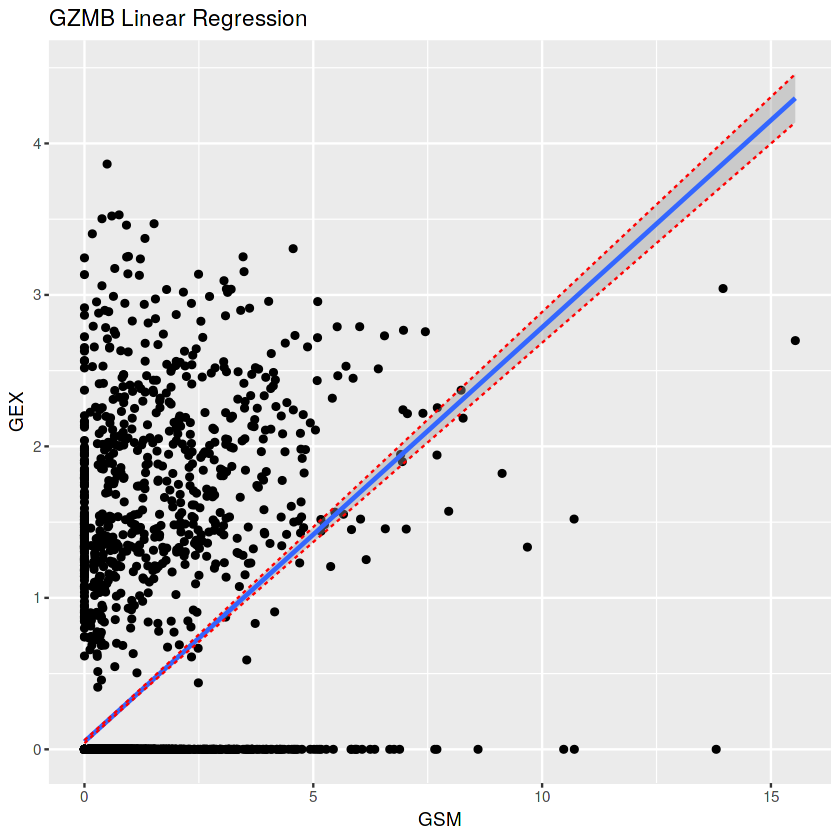

`geom_smooth()` using formula 'y ~ x'



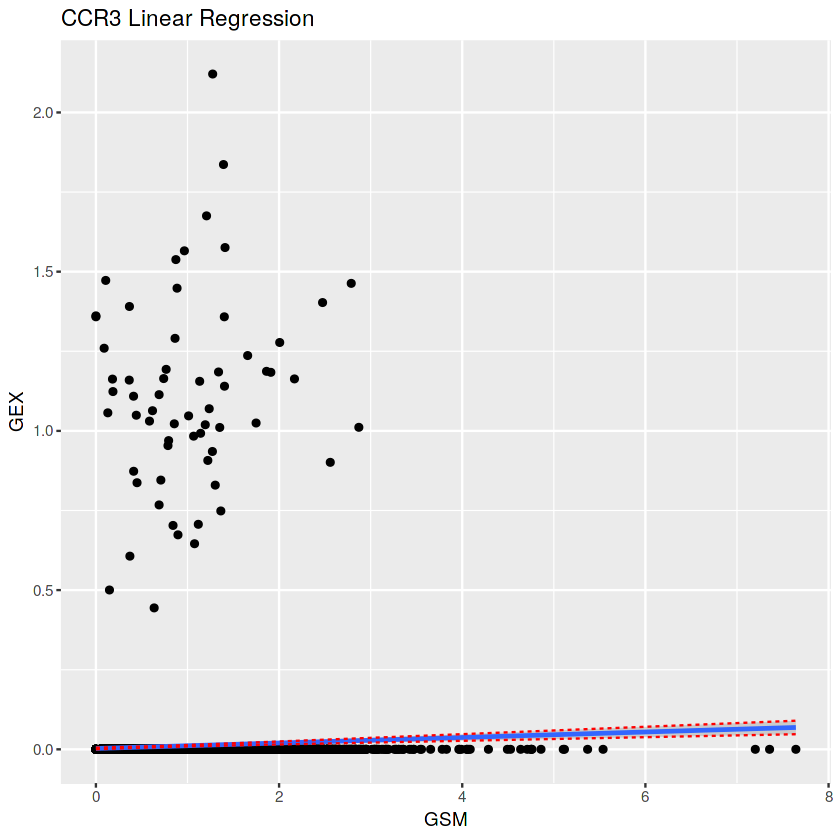

`geom_smooth()` using formula 'y ~ x'



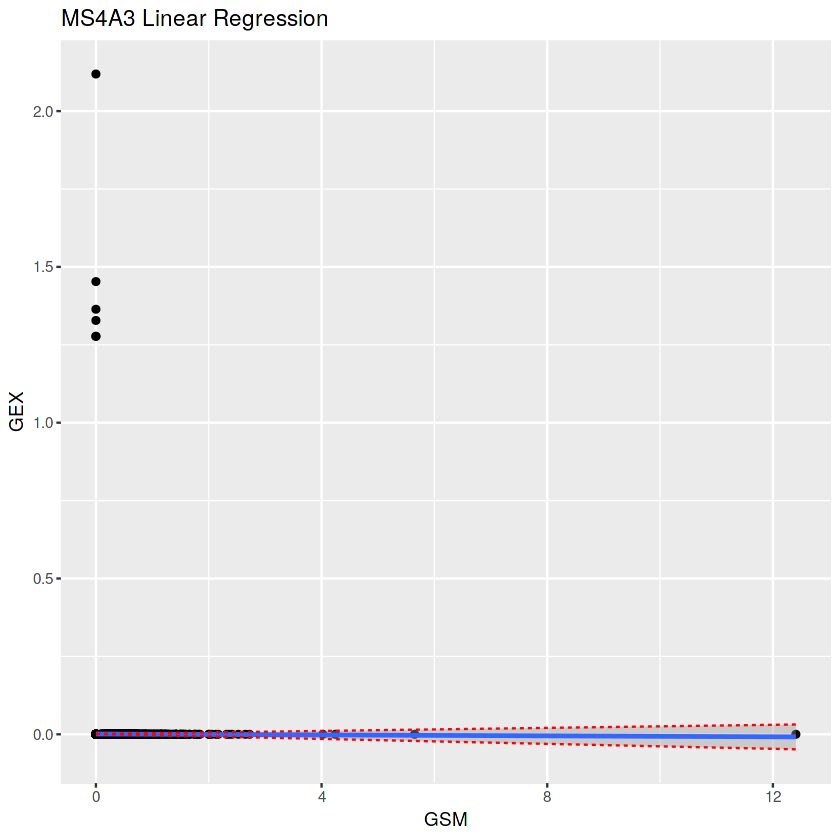

`geom_smooth()` using formula 'y ~ x'



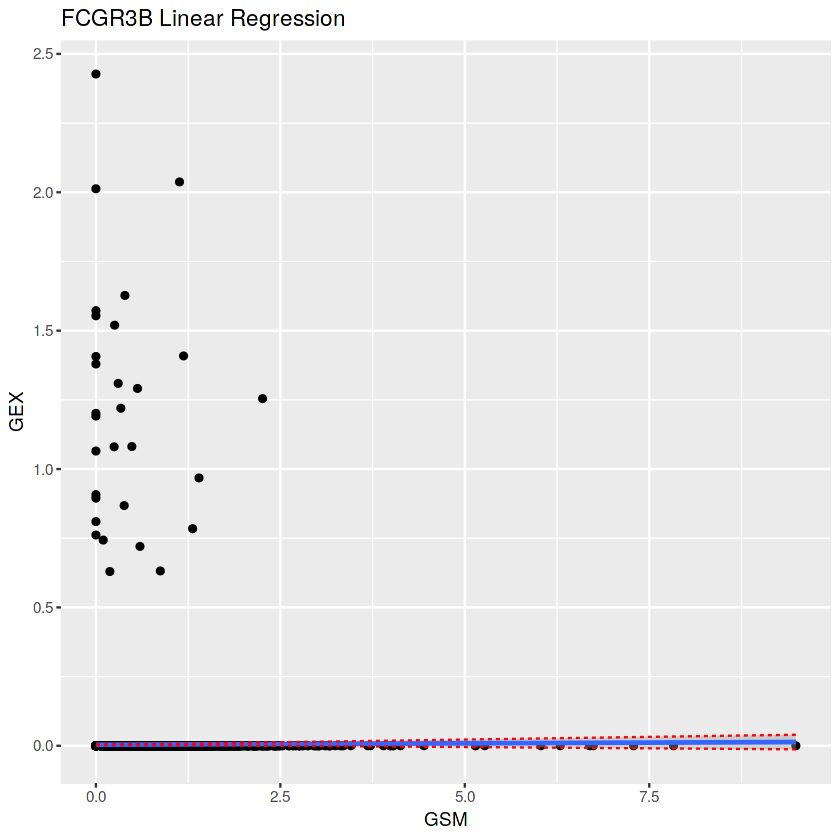

`geom_smooth()` using formula 'y ~ x'



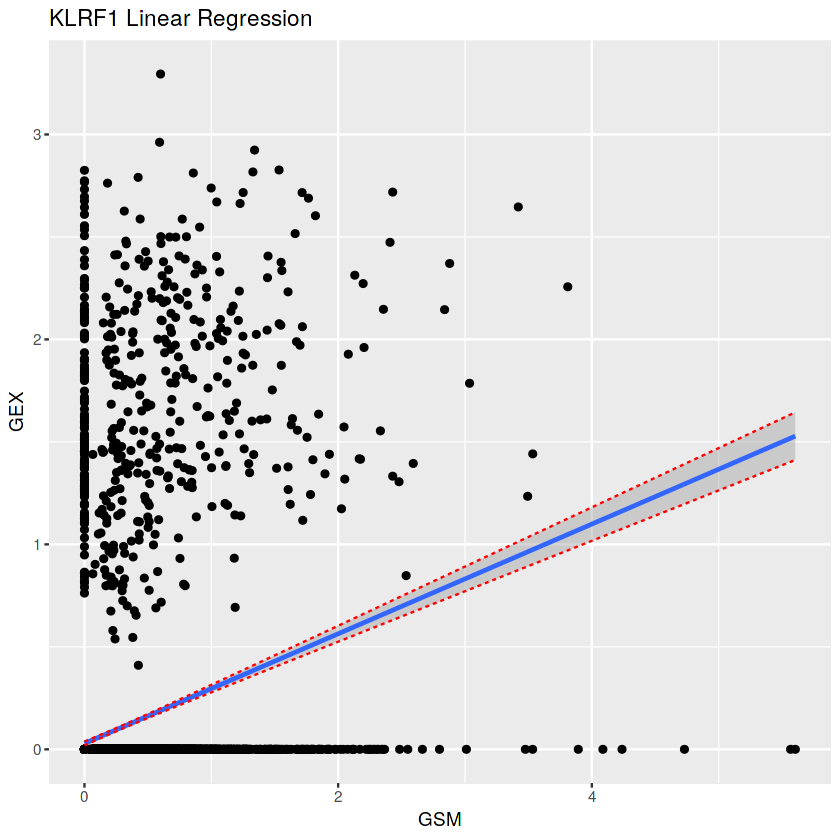

`geom_smooth()` using formula 'y ~ x'



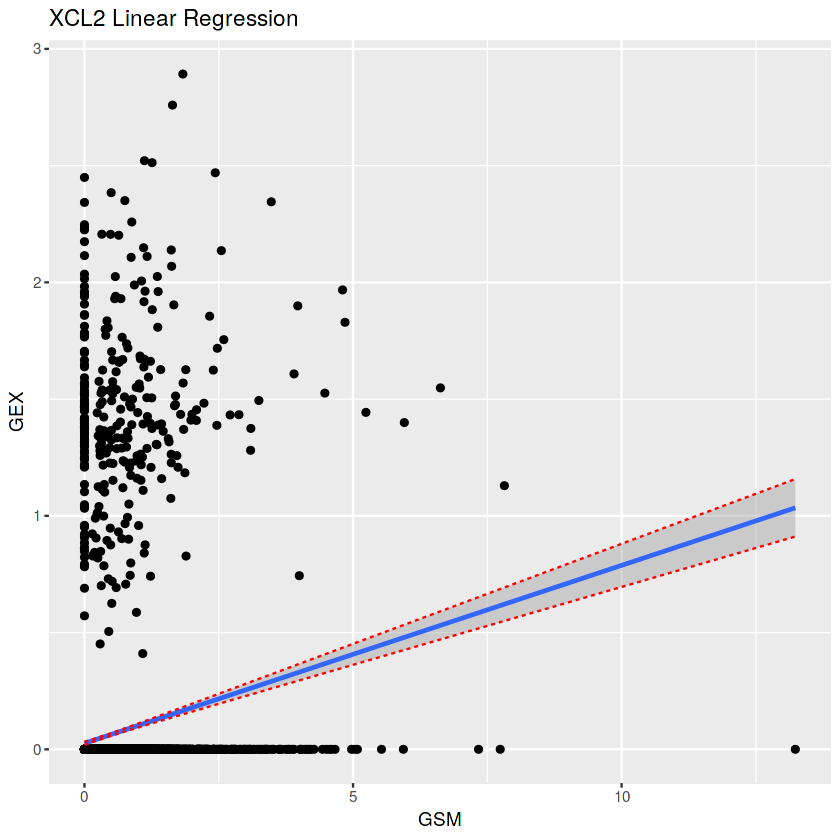

`geom_smooth()` using formula 'y ~ x'



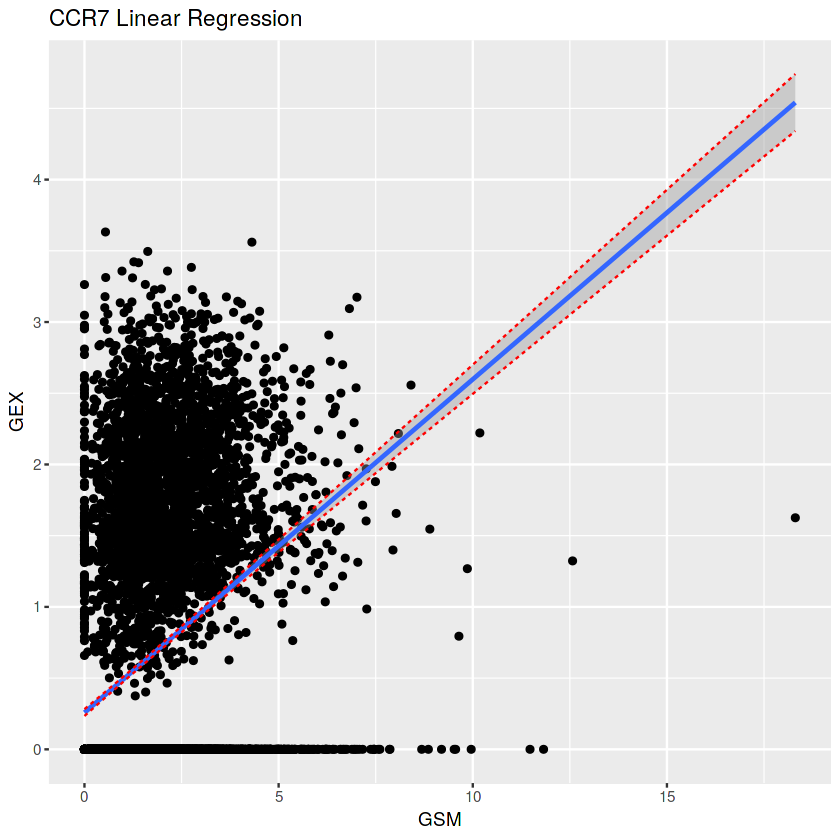

`geom_smooth()` using formula 'y ~ x'



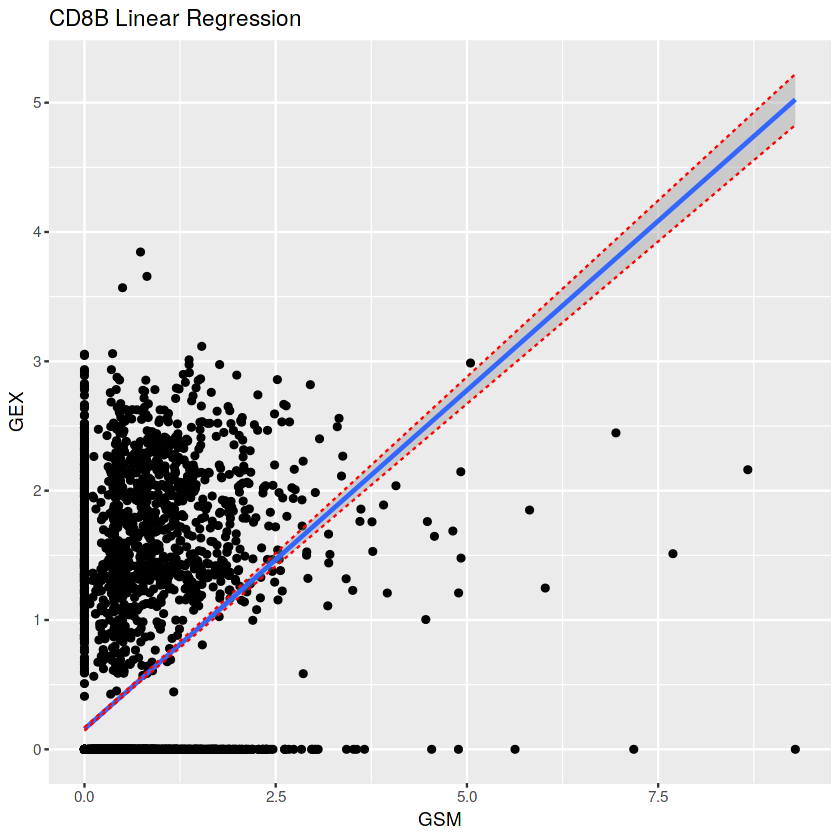

`geom_smooth()` using formula 'y ~ x'



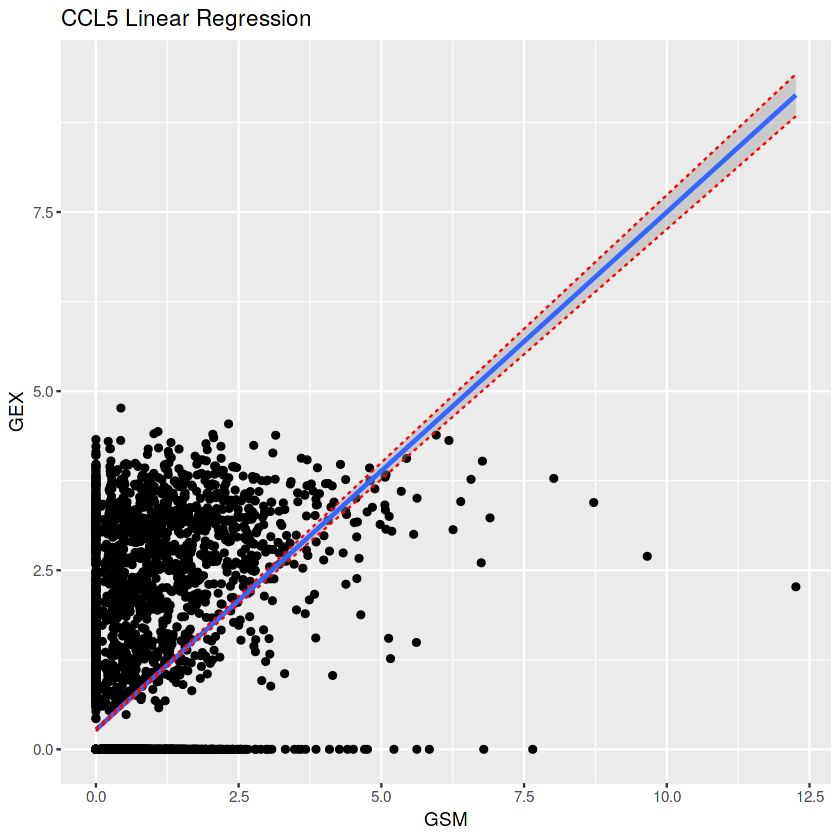

`geom_smooth()` using formula 'y ~ x'



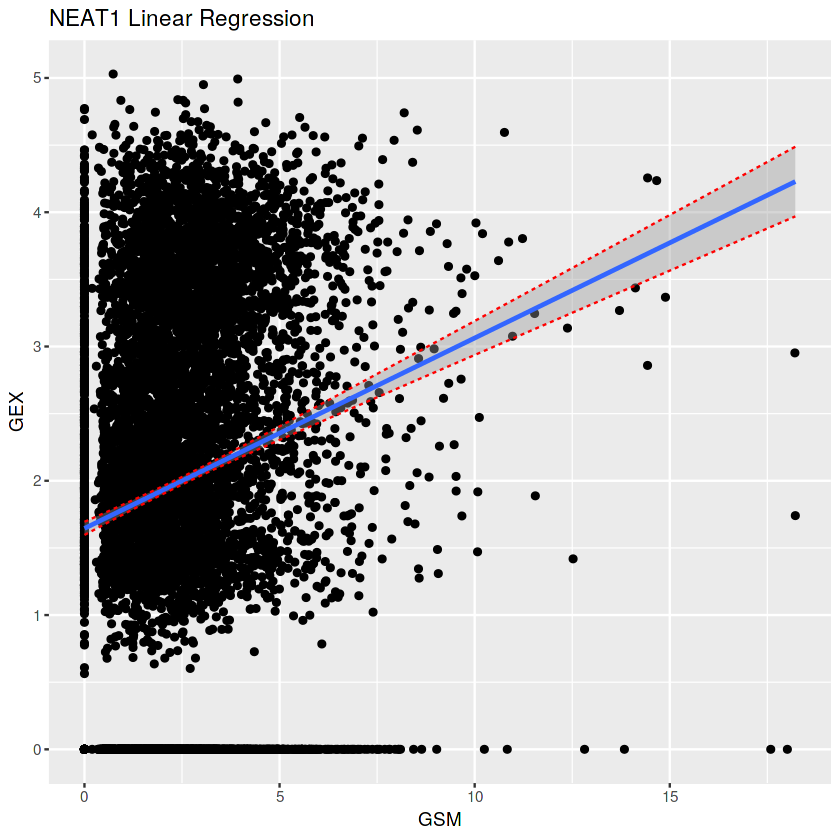

`geom_smooth()` using formula 'y ~ x'



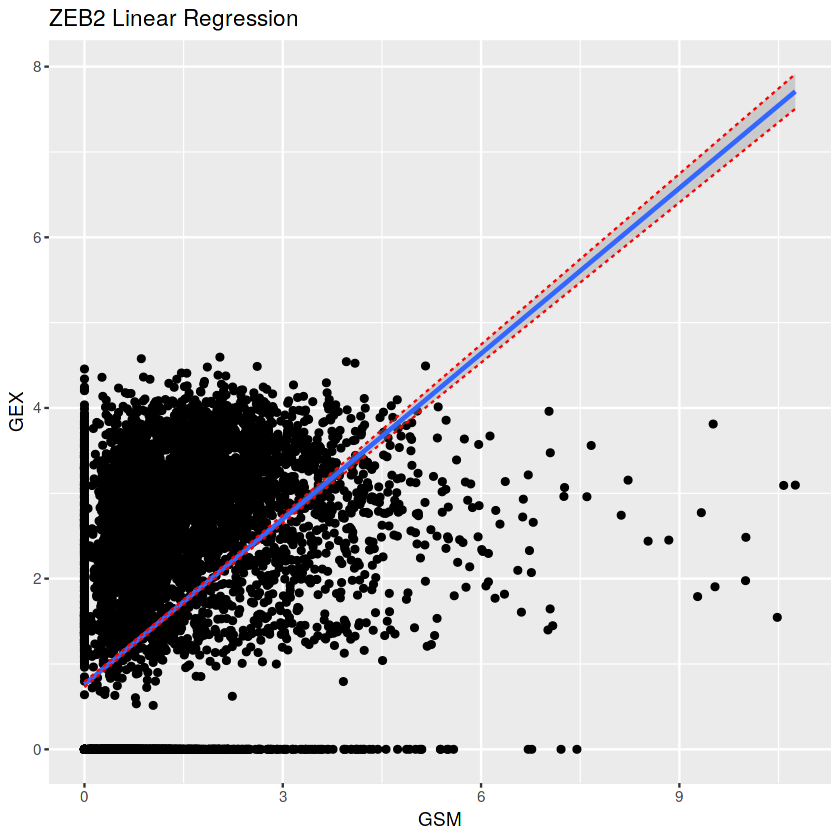

`geom_smooth()` using formula 'y ~ x'



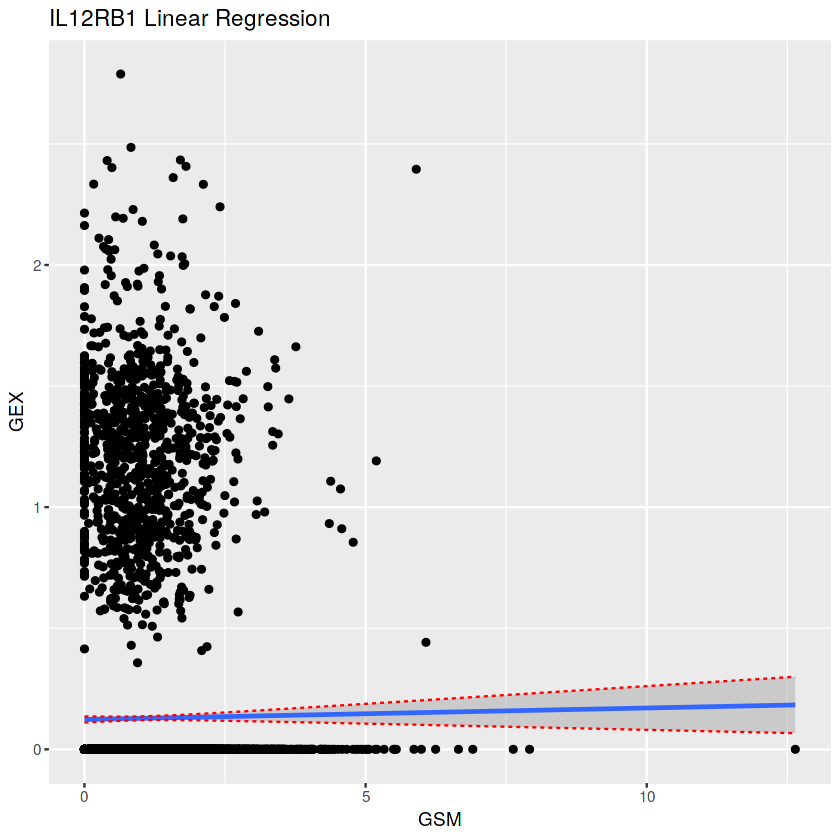

`geom_smooth()` using formula 'y ~ x'



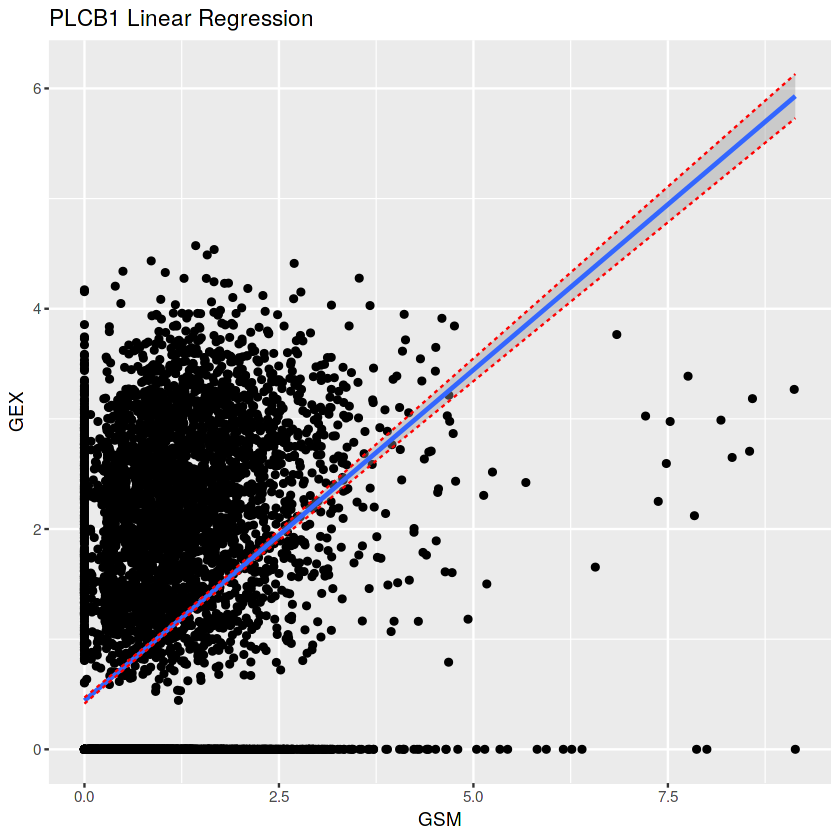

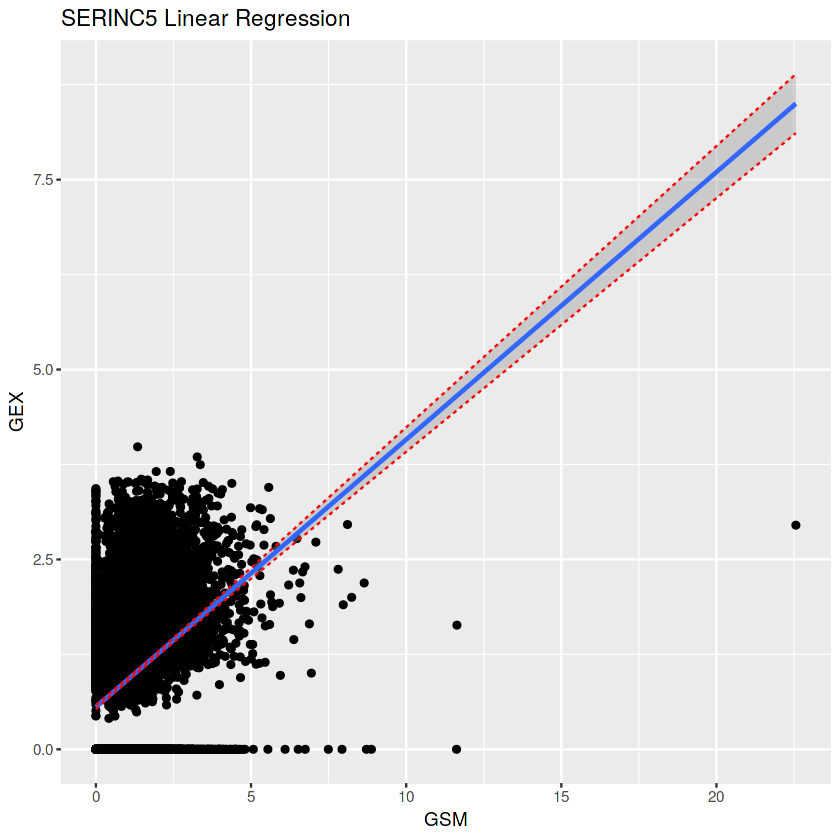

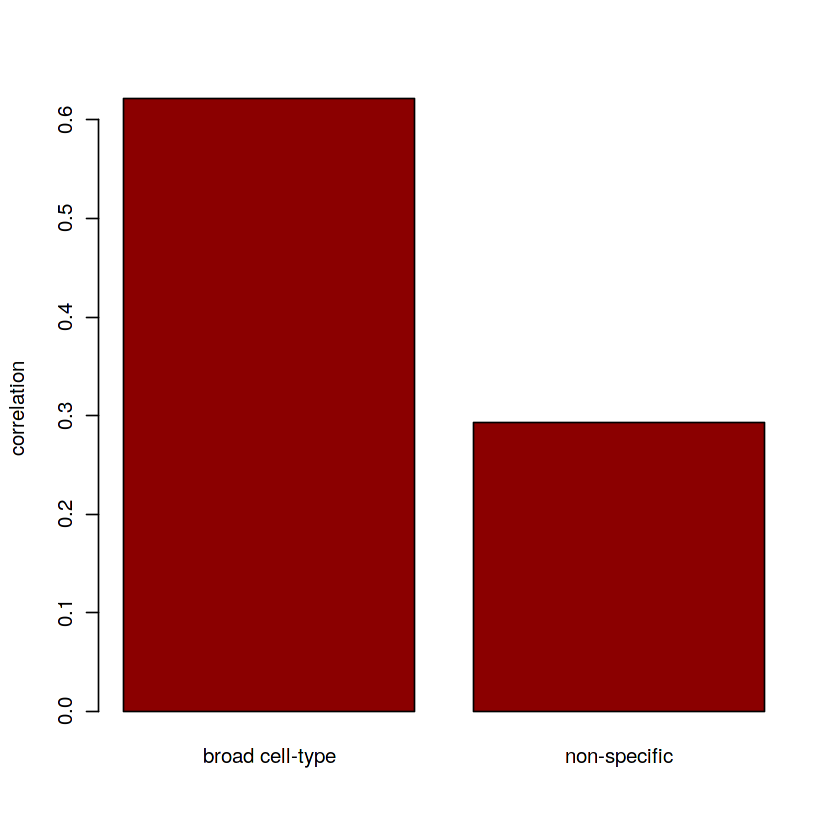

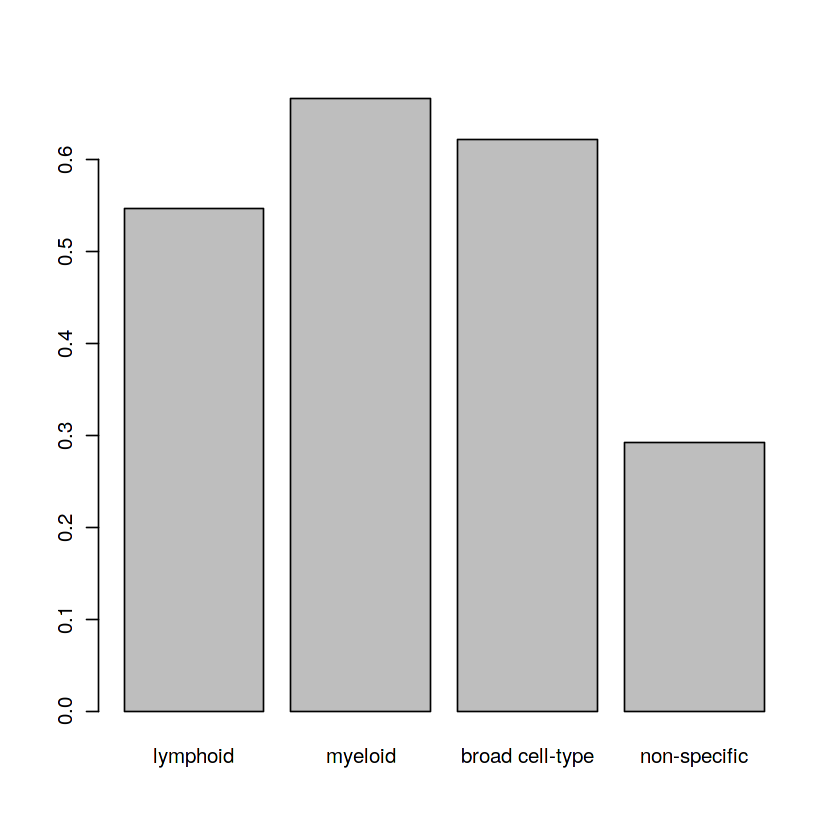

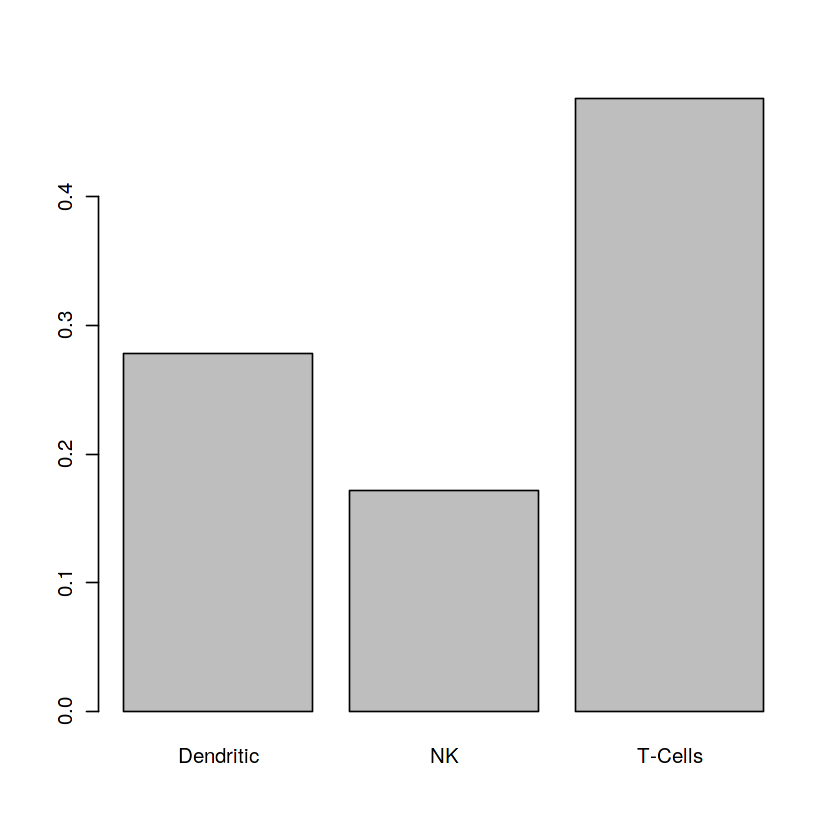

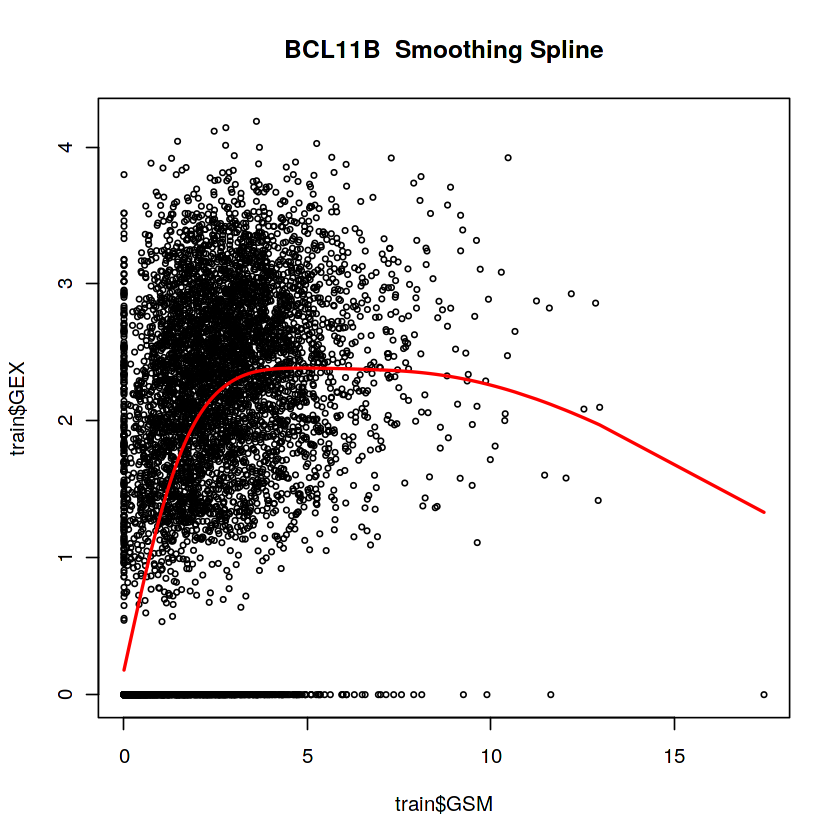

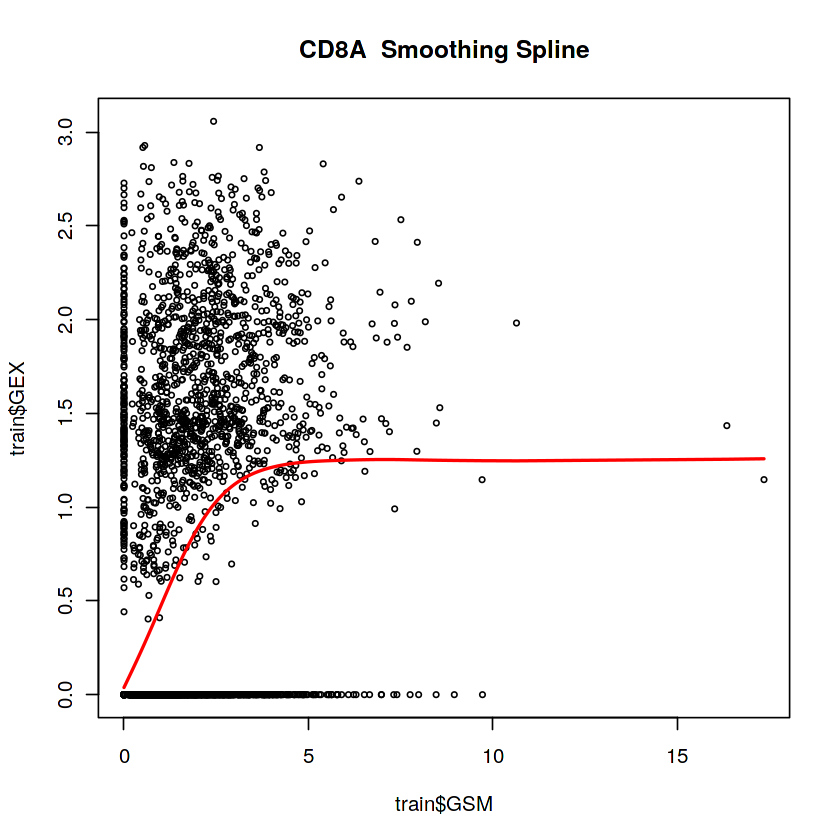

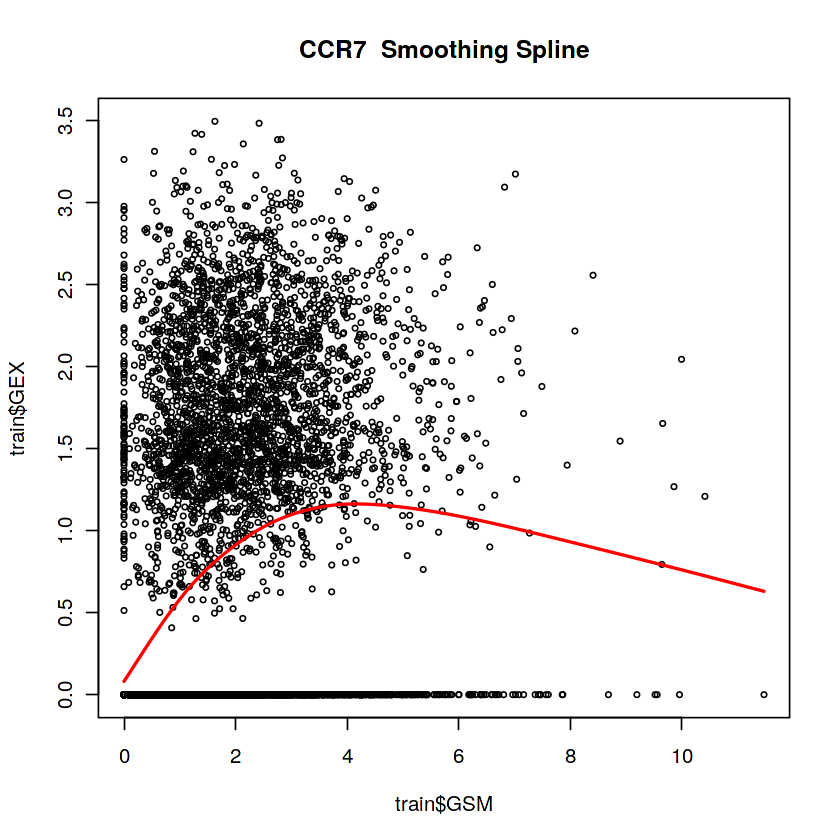

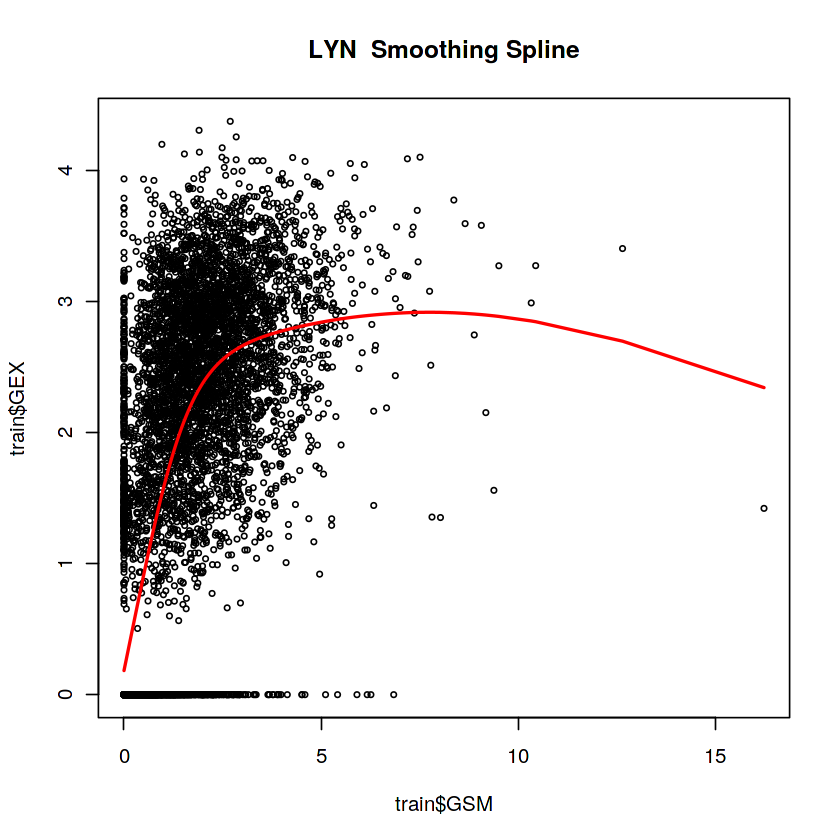

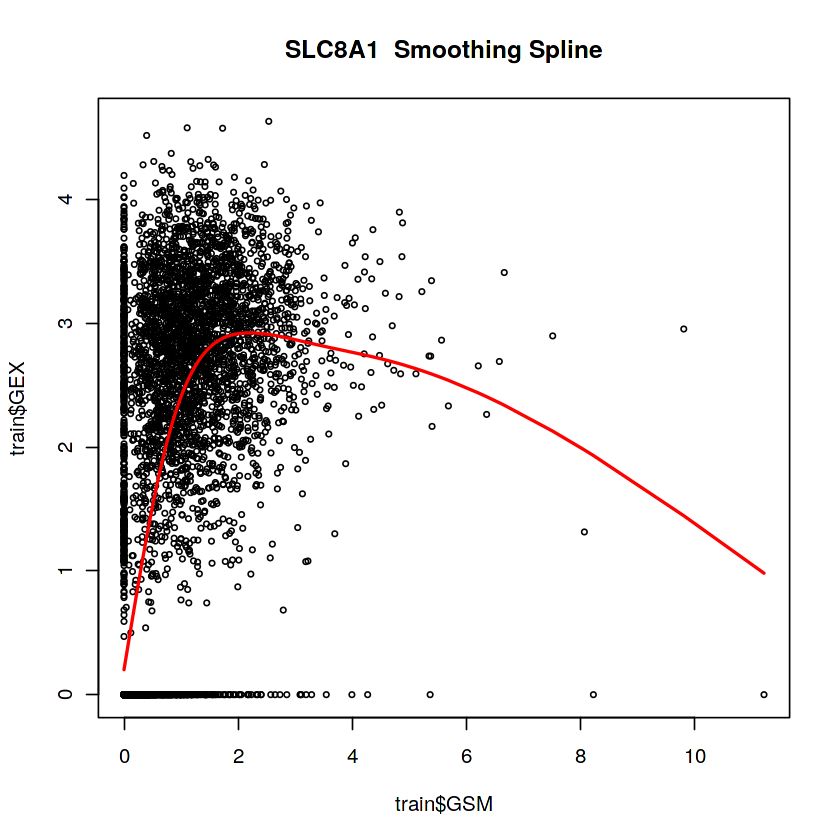

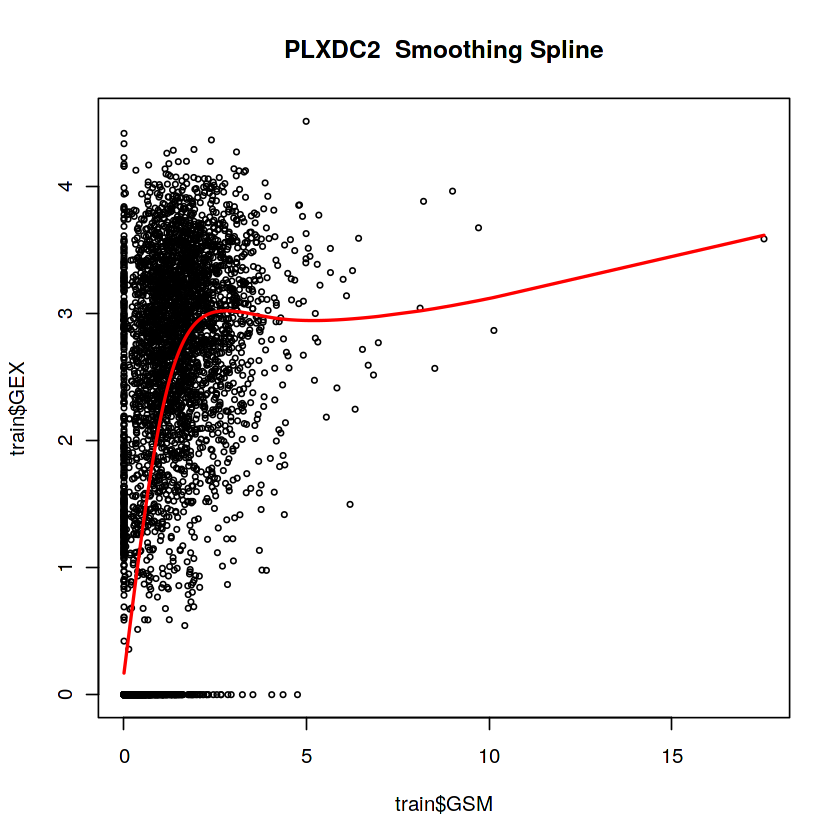

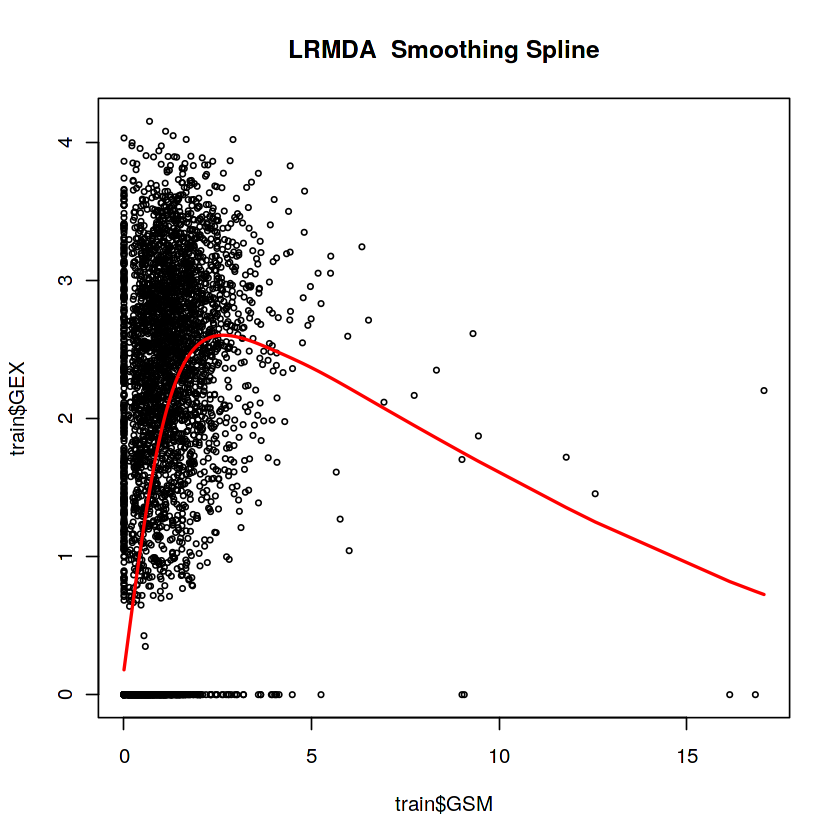

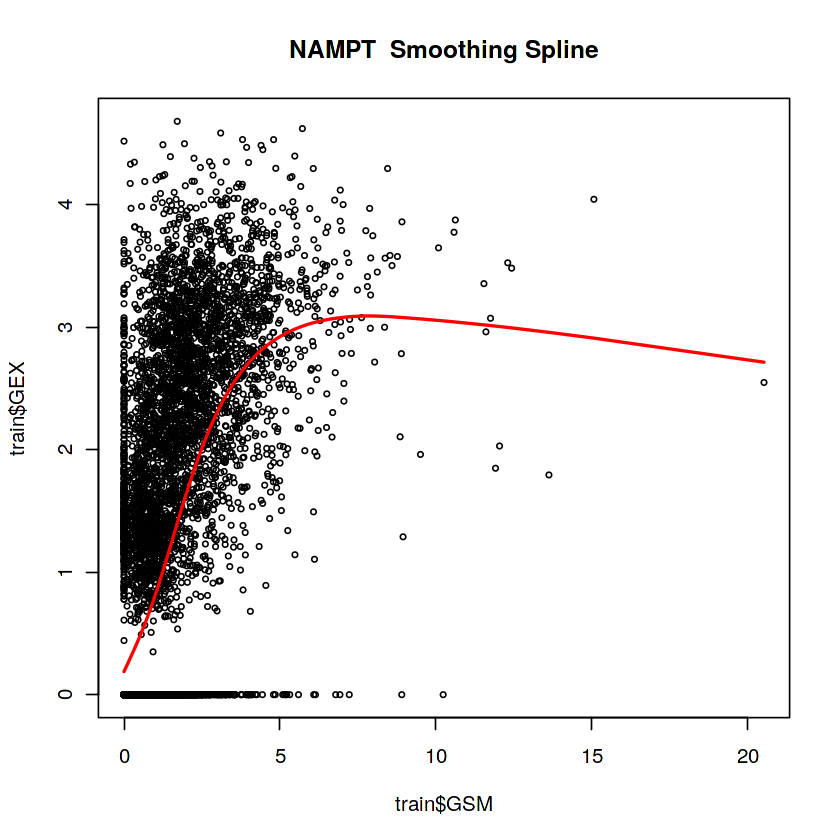

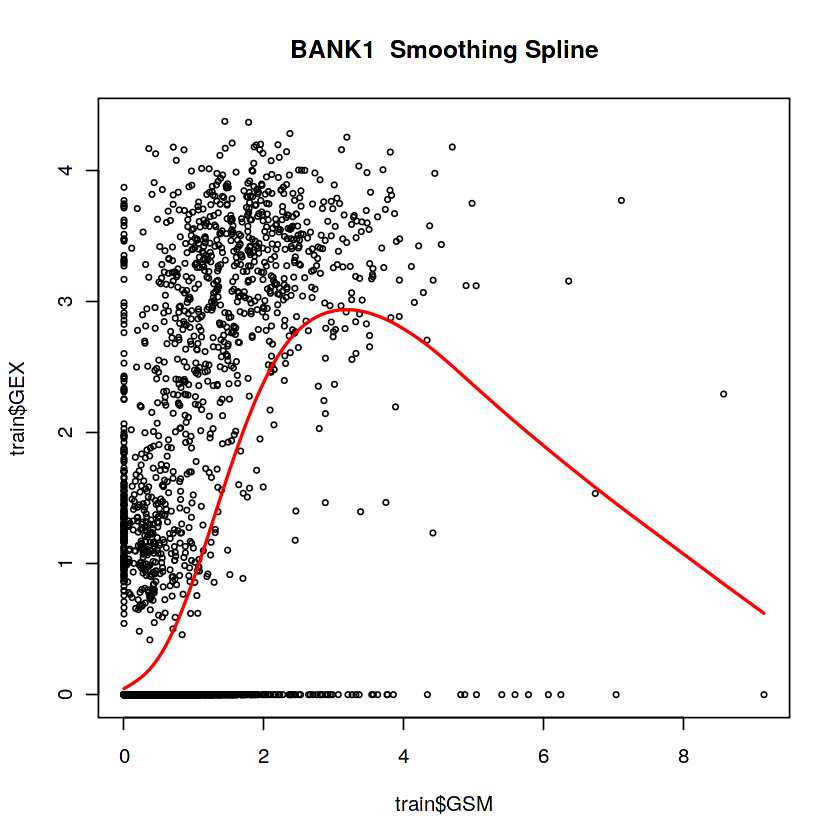

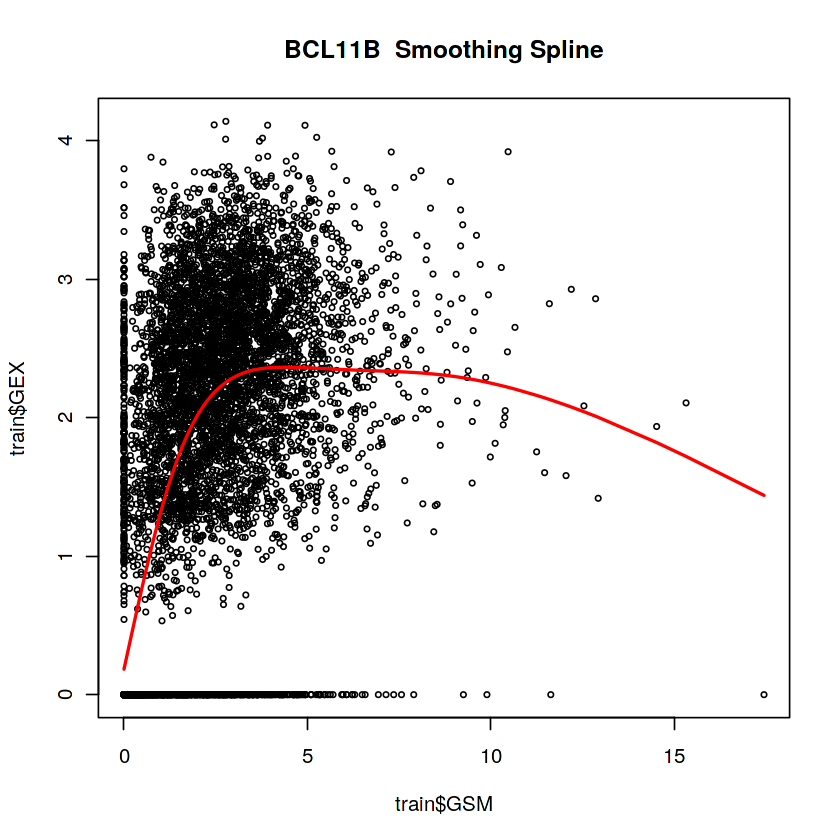

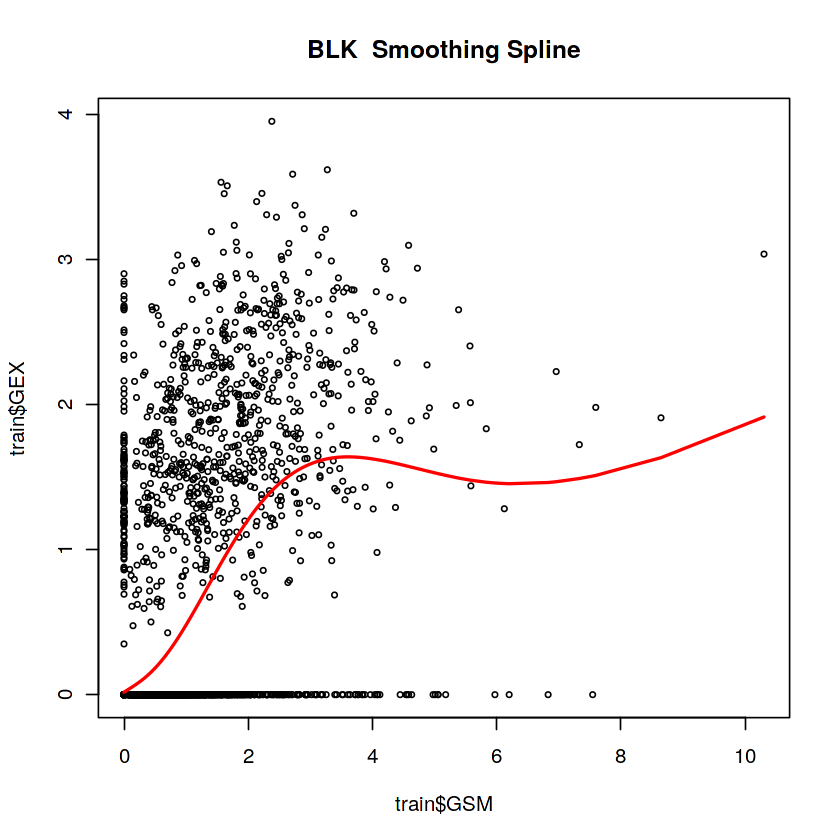

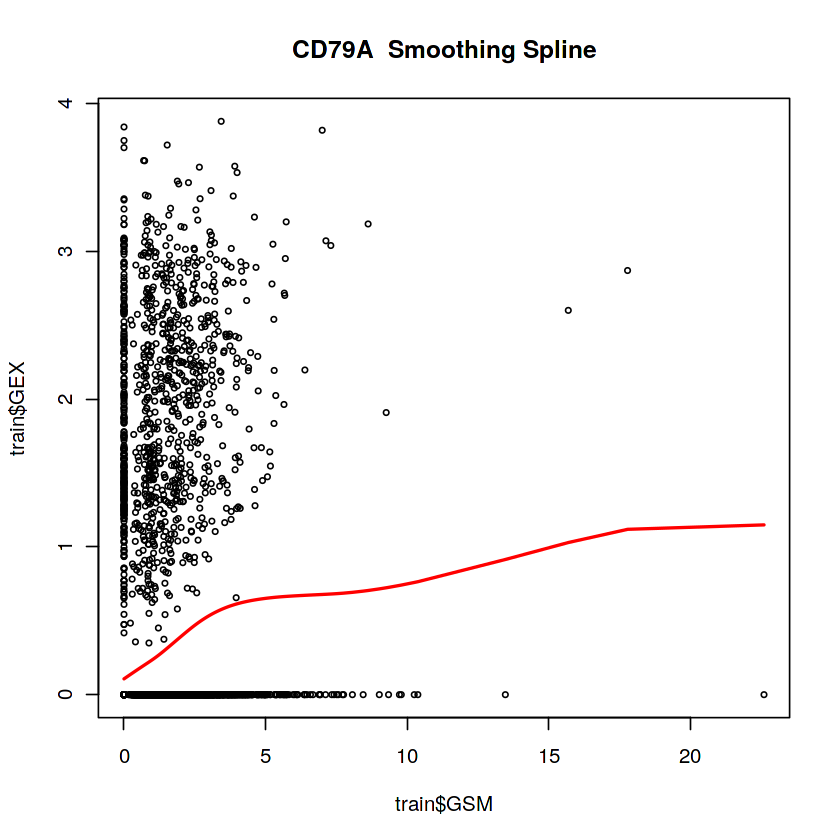

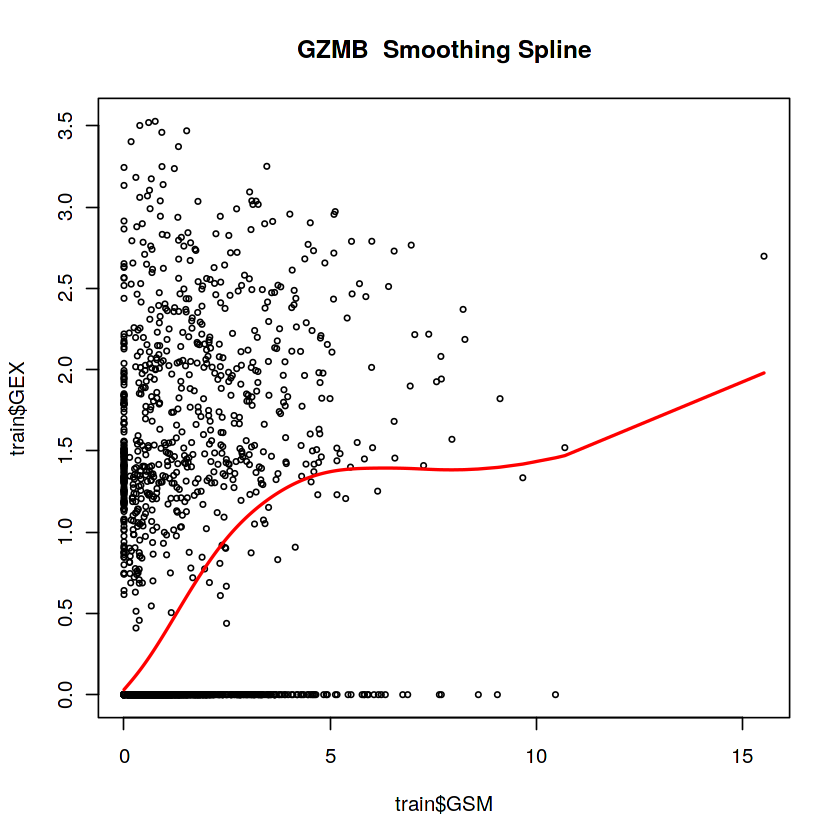

ERROR: Error in smooth.spline(train$GSM, train$GEX, df = df): 'tol' must be strictly positive and finite


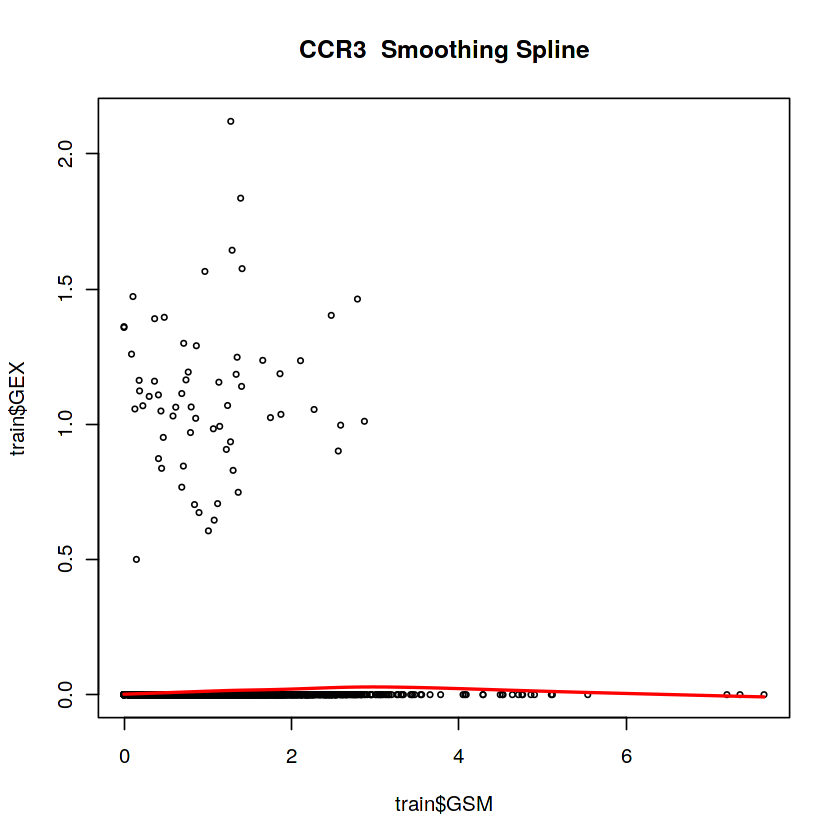

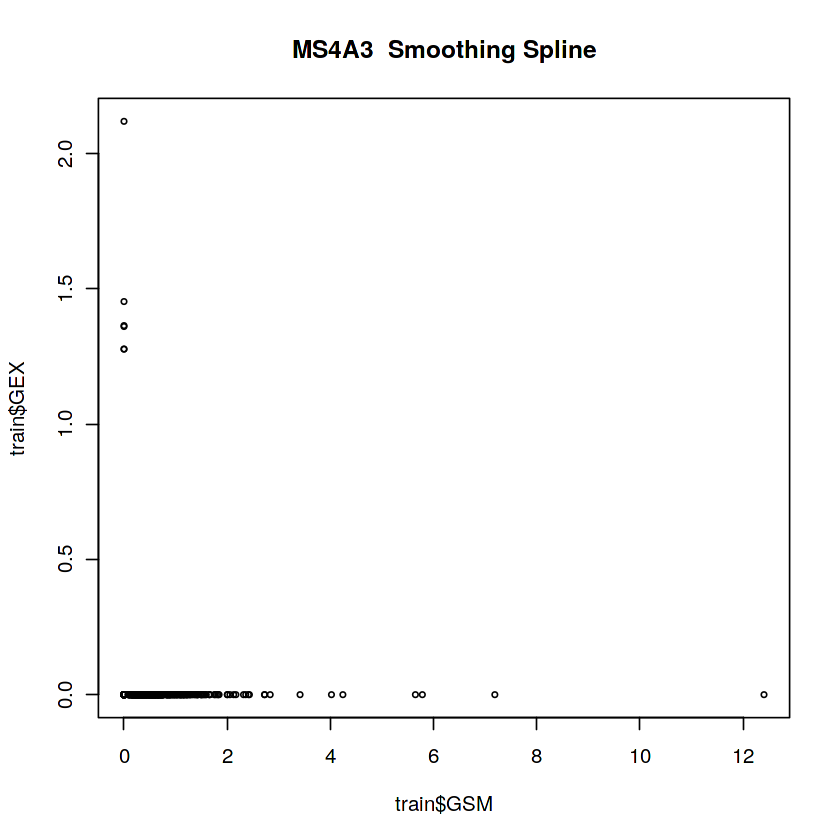

In [49]:
#######################################
############ ANALYSIS #################
#######################################

###### SINGLE GENE ######
# Will test a number of different linear gene models

# LYMPHOID
BCL11B <- singleGeneRegression("BCL11B")
CD8A <- singleGeneRegression("CD8A")
CCR7 <- singleGeneRegression("CCR7")
lymphoid <- c(BCL11B, CD8A, CCR7)

# MYELOID
LYN <- singleGeneRegression("LYN")
SLC8A1 <- singleGeneRegression("SLC8A1")
PLXDC2 <- singleGeneRegression("PLXDC2")
LRMDA <- singleGeneRegression("LRMDA")
NAMPT <- singleGeneRegression("NAMPT")
myeloid <- c(LYN, SLC8A1, PLXDC2, LRMDA, NAMPT)

# BROAD CELL-TYPE
broad_cell_type <- c(lymphoid, myeloid)

# B-Cell
BANK1 <- singleGeneRegression("BANK1")
BCL11B <- singleGeneRegression("BCL11B")
BLK <- singleGeneRegression("BLK")
CD79A <- singleGeneRegression("CD79A")
bcell <- c(BANK1, BCL11B, BLK, CD79A)

# DENDRITIC
PLD4 <- singleGeneRegression("PLD4")
GZMB <- singleGeneRegression("GZMB")
dendritic <- c(PLD4, GZMB)

# GRANULOCYTES
CCR3 <- singleGeneRegression("CCR3")
MS4A3 <- singleGeneRegression("MS4A3")
FCGR3B <- singleGeneRegression("FCGR3B")
granulocytes <- c(CCR3, MS4A3, FCGR3B)

# NATURAL KILLER
KLRF1 <- singleGeneRegression("KLRF1")
XCL2 <- singleGeneRegression("XCL2")
natural_killer <- c(KLRF1, XCL2)

# T-CELLS
CCR7 <- singleGeneRegression("CCR7")
CD8B <- singleGeneRegression("CD8B")
CCL5 <- singleGeneRegression("CCL5")
t_cells <- c(CCR7, CD8B, CCL5)

# Non-specific
NEAT1 <- singleGeneRegression("NEAT1")
ZEB2 <- singleGeneRegression("ZEB2")
IL12RB1 <- singleGeneRegression("IL12RB1")
PLCB1 <- singleGeneRegression("PLCB1")
SERINC5 <- singleGeneRegression("SERINC5")
non_specific <- c(NEAT1, ZEB2, IL12RB1, PLCB1, SERINC5)

# plotting specific vs non-specific
names = c("broad cell-type", "non-specific")
barplot(c(mean(broad_cell_type), mean(non_specific)), names=names, col='darkred', ylab="correlation", width=c(0.1,0.1), space=c(0.2,0.2))

# lymphoid, myeloid, broad cell-type, and non-specific
names = c("lymphoid", "myeloid", "broad cell-type", "non-specific")
barplot(c(mean(lymphoid), mean(myeloid), mean(broad_cell_type), mean(non_specific)), names=names)

# plotting narrow cell-types
names_narrow = c("Dendritic", "NK", "T-Cells")
barplot(c(mean(dendritic), mean(natural_killer), mean(t_cells)), names=names_narrow)

# spline gene models
# LYMPHOID
BCL11B_spline <- singleGeneSpline("BCL11B")
CD8A_spline <- singleGeneSpline("CD8A")
CCR7_spline <- singleGeneSpline("CCR7")
lymphoid_spline <- c(BCL11B_spline, CD8A_spline, CCR7_spline)

# MYELOID
LYN_spline <- singleGeneSpline("LYN")
SLC8A1_spline <- singleGeneSpline("SLC8A1")
PLXDC2_spline <- singleGeneSpline("PLXDC2")
LRMDA_spline <- singleGeneSpline("LRMDA")
NAMPT_spline <- singleGeneSpline("NAMPT")
myeloid_spline <- c(LYN_spline, SLC8A1_spline, PLXDC2_spline, LRMDA_spline, NAMPT_spline)

# BROAD CELL-TYPE
broad_cell_type_spline <- c(lymphoid_spline, myeloid_spline)

# B-Cell
BANK1_spline <- singleGeneSpline("BANK1")
BCL11B_spline <- singleGeneSpline("BCL11B")
BLK_spline <- singleGeneSpline("BLK")
CD79A_spline <- singleGeneSpline("CD79A")
bcell_spline <- c(BANK1_spline, BCL11B_spline, BLK_spline, CD79A_spline)

# DENDRITIC
# PLD4_spline <- singleGeneSpline("PLD4")
GZMB_spline <- singleGeneSpline("GZMB")
dendritic_spline <- c(GZMB_spline)

# GRANULOCYTES
CCR3_spline <- singleGeneSpline("CCR3")
MS4A3_spline <- singleGeneSpline("MS4A3")
FCGR3B_spline <- singleGeneSpline("FCGR3B")
granulocytes_spline <- c(CCR3_spline, MS4A3_spline, FCGR3B_spline)

# NATURAL KILLER
KLRF1_spline <- singleGeneSpline("KLRF1")
XCL2_spline <- singleGeneSpline("XCL2")
natural_killer_spline <- c(KLRF1_spline, XCL2_spline)

# T-CELLS
CCR7_spline <- singleGeneSpline("CCR7")
CD8B_spline <- singleGeneSpline("CD8B")
CCL5_spline <- singleGeneSpline("CCL5")
t_cells_spline <- c(CCR7_spline, CD8B_spline, CCL5_spline)

# Non-specific
NEAT1_spline <- singleGeneSpline("NEAT1")
ZEB2_spline <- singleGeneSpline("ZEB2")
IL12RB1_spline <- singleGeneSpline("IL12RB1")
PLCB1_spline <- singleGeneSpline("PLCB1")
SERINC5_spline <- singleGeneSpline("SERINC5")
non_specific_spline <- c(NEAT1_spline, ZEB2_spline, IL12RB1_spline, PLCB1_spline, SERINC5_spline)

# plotting specific vs non-specific
names = c("broad cell-type", "non-specific")
barplot(c(mean(broad_cell_type_spline), mean(non_specific_spline)), names=names, col='darkred', ylab="correlation")

# lymphoid, myeloid, broad cell-type, and non-specific
names = c("lymphoid", "myeloid", "broad cell-type", "non-specific")
barplot(c(mean(lymphoid_spline), mean(myeloid_spline), mean(broad_cell_type_spline), mean(non_specific_spline)), names=names)

# plotting narrow cell-types
names_narrow = c("Dendritic", "NK", "T-Cells")
barplot(c(mean(dendritic_spline), mean(natural_killer_spline), mean(t_cells_spline)), names=names_narrow)

# plotting broad cell vs non-specific for linear and splines
names = c("broad cell-type", "non-specific","broad cell-type_spline", "non-specific_spline")
barplot(c(mean(broad_cell_type), mean(non_specific), mean(broad_cell_type_spline), mean(non_specific_spline)), names=names, col='darkred', ylab="correlation")

######## GENE ONTOLOGY #######
# running some sample gene ontology models to show poor performance